In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/lstm-rul-yl"))

['RUL_FD002.txt', 'test_FD003.txt', 'Damage Propagation Modeling.pdf', 'readme.txt', 'train_FD003.txt', 'test_FD004.txt', 'train_FD004.txt', 'test_FD002.txt', 'train_FD001.txt', 'train_FD002.txt', 'RUL_FD001.txt', 'RUL_FD004.txt', 'RUL_FD003.txt', 'test_FD001.txt']


In [2]:
dataPath = '../input/lstm-rul-yl'

In [3]:
setNumber = 1

In [4]:
id_col = ['id']
cycle_col = ['cycle']
setting_cols = ['setting1', 'setting2', 'setting3']
sensor_cols = ['sensor' + str(i) for i in range(1, 22)]
rul_col = ['RUL']
all_cols = id_col + cycle_col + setting_cols + sensor_cols + rul_col

# Load train/test data with RUL

In [5]:
# This section is to load data
def loadData(fileName):
    data = pd.read_csv(fileName, sep=" ", header=None)
    data.drop([26, 27], axis = 1, inplace=True)
    data.columns = id_col + cycle_col + setting_cols +sensor_cols
    return data
'''
这个函数的处理过程如下：

使用pd.read_csv(fileName, sep=" ", header=None)加载指定的文件。这里使用pd.read_csv()函数读取CSV文件，fileName是文件名，sep=" "表示CSV文件中的分隔符是空格，header=None表示文件没有列名。

使用data.drop([26, 27], axis=1, inplace=True)删除数据中的第26列和第27列。drop()函数用于删除指定的行或列，axis=1表示删除列，inplace=True表示在原数据上进行操作。

创建列名列表columns，列名列表包括id_col、cycle_col、setting_cols和sensor_cols。这些列名将用于给数据集中的列命名。

使用data.columns = columns将列名列表赋值给数据集的列名。这样就为数据集中的每一列赋予了对应的列名。

返回处理后的数据集data。

总结起来，该函数的作用是加载指定的CSV文件并对数据进行处理，包括删除指定的列和为数据集中的每一列添加对应的列名。
'''

'\n这个函数的处理过程如下：\n\n使用pd.read_csv(fileName, sep=" ", header=None)加载指定的文件。这里使用pd.read_csv()函数读取CSV文件，fileName是文件名，sep=" "表示CSV文件中的分隔符是空格，header=None表示文件没有列名。\n\n使用data.drop([26, 27], axis=1, inplace=True)删除数据中的第26列和第27列。drop()函数用于删除指定的行或列，axis=1表示删除列，inplace=True表示在原数据上进行操作。\n\n创建列名列表columns，列名列表包括id_col、cycle_col、setting_cols和sensor_cols。这些列名将用于给数据集中的列命名。\n\n使用data.columns = columns将列名列表赋值给数据集的列名。这样就为数据集中的每一列赋予了对应的列名。\n\n返回处理后的数据集data。\n\n总结起来，该函数的作用是加载指定的CSV文件并对数据进行处理，包括删除指定的列和为数据集中的每一列添加对应的列名。\n'

In [6]:
# load train RUL also returns the max cycle, and this max cycle is also the life cylce
def addTrainRul(data, decrease_threshold=None):
    lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() for mcId in data['id'].unique()}
    if decrease_threshold == None: decrease_threshold = 1
    ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
    data['RUL'] = ruls
    return lifeCycles
'''
该函数的作用是在加载的训练数据集中添加剩余使用寿命 (RUL) 列，并返回最大转数（cycle）。

函数的处理过程如下：

创建一个字典 lifeCycles，其中键是不同机器（mcId），值是对应机器在数据集中的最大转数（cycle）。使用列表推导式遍历数据集中的唯一机器编号，逐个获取每台机器的最大转数。

如果没有提供 decrease_threshold 参数，则将其设置为 1。

使用列表推导式根据以下规则生成 RUL 值：如果转数小于 decrease_threshold，则使用最大转数减去 decrease_threshold；否则，使用最大转数减去当前转数。

将生成的 RUL 列赋值给数据集的新列 'RUL'。

返回字典 lifeCycles，其中键是机器编号，值是对应机器的最大转数。

总结起来，该函数的主要功能是在训练数据集中添加 RUL 列，并返回包含每台机器最大转数的字典。RUL 的计算方式是根据最大转数和当前转数进行简单的减法运算，并根据阈值 decrease_threshold 进行调整。
'''
    
# use this last one only, return the data as well as the max life cycles
def loadTrainData(setNumber, decrease_threshold=None):
    fileName = dataPath + '/train_FD00' + str(setNumber) + '.txt'
    data = loadData(fileName)
    lifeCycles = addTrainRul(data, decrease_threshold)
    return data, lifeCycles
'''
这个函数的作用是加载训练数据集，并返回数据集以及每台机器的最大使用寿命（life cycles）。

函数的处理过程如下：

根据给定的 setNumber 构建训练数据集文件名 fileName。假设数据路径（dataPath）是一个变量，文件名的格式是 "train_FD00X.txt"，其中 X 是 setNumber 的值。

使用 loadData(fileName) 加载训练数据集。这里调用了之前定义的 loadData() 函数来读取数据，并将返回的数据集赋值给 data。

使用 addTrainRul(data, decrease_threshold) 调用 addTrainRul() 函数，在数据集中添加剩余使用寿命（RUL）列，并获取每台机器的最大使用寿命字典 lifeCycles。这里传入了可选参数 decrease_threshold。

返回加载的数据集 data 和每台机器的最大使用寿命字典 lifeCycles。

总结起来，这个函数的作用是加载训练数据集并添加 RUL 列，同时返回数据集和每台机器的最大使用寿命信息。
'''

'\n这个函数的作用是加载训练数据集，并返回数据集以及每台机器的最大使用寿命（life cycles）。\n\n函数的处理过程如下：\n\n根据给定的 setNumber 构建训练数据集文件名 fileName。假设数据路径（dataPath）是一个变量，文件名的格式是 "train_FD00X.txt"，其中 X 是 setNumber 的值。\n\n使用 loadData(fileName) 加载训练数据集。这里调用了之前定义的 loadData() 函数来读取数据，并将返回的数据集赋值给 data。\n\n使用 addTrainRul(data, decrease_threshold) 调用 addTrainRul() 函数，在数据集中添加剩余使用寿命（RUL）列，并获取每台机器的最大使用寿命字典 lifeCycles。这里传入了可选参数 decrease_threshold。\n\n返回加载的数据集 data 和每台机器的最大使用寿命字典 lifeCycles。\n\n总结起来，这个函数的作用是加载训练数据集并添加 RUL 列，同时返回数据集和每台机器的最大使用寿命信息。\n'

In [7]:
decrease_threshold = None
train, trainLifeCycles = loadTrainData(setNumber, decrease_threshold)

In [8]:
def loadTestRul(fileName):
    data = pd.read_csv(fileName, sep = " ", header=None)
    data.drop([1], axis=1, inplace=True)
    data.columns = ['RUL']
    return data
'''
这个函数的作用是加载测试数据集的 RUL（剩余使用寿命）。

函数的处理过程如下：

使用 pandas 的 read_csv() 函数从指定的文件名 fileName 加载测试数据集。数据集使用空格作为分隔符，且没有列名。

使用 drop() 函数删除第二列（索引为 1）的数据。这里通过设置 axis=1 来指定删除列。

使用 columns 属性给数据集的列命名，将列名设置为 'RUL'。

返回新的数据集。

总结起来，该函数的主要功能是加载测试数据集并对数据进行处理，结果只包含一个名为 'RUL' 的列。
'''
def addTestRul(data, rulData, decrease_threshold=None):
    testRuls = {i+1: rulData.iloc[i, 0] for i in range(len(rulData))}
    lifeCycles = {mcId: data[data['id']==mcId]['cycle'].max() + testRuls[mcId] for mcId in data['id'].unique()}
    if decrease_threshold == None: decrease_threshold = 1
    ruls = [lifeCycles[row[0]] - decrease_threshold if row[1] < decrease_threshold else lifeCycles[row[0]] - row[1] for row in data.values]
    data['RUL'] = ruls
    return lifeCycles
'''
这个函数的作用是在测试数据集中添加 RUL（剩余使用寿命）列，并返回每台机器的最大使用寿命字典。

函数的处理过程如下：

创建一个字典 testRuls，其中键是机器编号（mcId），值是对应机器的测试 RUL 值。通过遍历 rulData 中的行，取得每个机器的测试 RUL 值，然后将其添加到 testRuls 字典中。

创建一个字典 lifeCycles，其中键是机器编号（mcId），值是对应机器的最大使用寿命。通过遍历数据集中唯一的机器编号 data['id'].unique()，逐个获取每台机器的最大转数（cycle）。并将最大转数与对应机器的测试 RUL 值相加得到最大使用寿命。

如果没有提供 decrease_threshold 参数，则将其设置为 1。

使用列表推导式根据以下规则生成 RUL 值：如果当前转数小于 decrease_threshold，则使用最大使用寿命减去 decrease_threshold；否则，使用最大使用寿命减去当前转数。

将生成的 RUL 列赋值给数据集的新列 'RUL'。

返回包含每台机器最大使用寿命的字典 lifeCycles。

总结起来，该函数的主要功能是在测试数据集中添加 RUL 列，并返回包含每台机器最大使用寿命的字典。RUL 的计算方式是根据最大使用寿命和当前转数进行简单的减法运算，并根据阈值 decrease_threshold 进行调整。
'''
# Use this last one only => return data as well as the max life cycles for each machine
def loadTestData(setNumber, decrease_threshold=None):
    data = loadData(dataPath + '/test_FD00' +str(setNumber)+'.txt')
    rulData = loadTestRul(dataPath + '/RUL_FD00' + str(setNumber)+'.txt')
    lifeCycles = addTestRul(data, rulData, decrease_threshold)
    return data, lifeCycles
'''
这个函数的作用是加载测试数据集，并添加 RUL（剩余使用寿命）列，同时返回每台机器的最大使用寿命字典。

函数的处理过程如下：

使用 loadData() 函数从指定的文件路径加载测试数据集。setNumber 参数用于构建测试数据集文件路径。

使用 loadTestRul() 函数从指定的文件路径加载测试 RUL 数据集。setNumber 参数用于构建测试 RUL 数据集文件路径。

使用 addTestRul() 函数在测试数据集中添加 RUL 列，并返回每台机器的最大使用寿命字典。decrease_threshold 参数用于调整 RUL 值的阈值，如果未提供则默认为 None。

返回测试数据集 data 以及每台机器的最大使用寿命字典 lifeCycles。

总结起来，该函数的主要功能是加载测试数据集并添加 RUL 列，同时返回每台机器的最大使用寿命字典。
'''

'\n这个函数的作用是加载测试数据集，并添加 RUL（剩余使用寿命）列，同时返回每台机器的最大使用寿命字典。\n\n函数的处理过程如下：\n\n使用 loadData() 函数从指定的文件路径加载测试数据集。setNumber 参数用于构建测试数据集文件路径。\n\n使用 loadTestRul() 函数从指定的文件路径加载测试 RUL 数据集。setNumber 参数用于构建测试 RUL 数据集文件路径。\n\n使用 addTestRul() 函数在测试数据集中添加 RUL 列，并返回每台机器的最大使用寿命字典。decrease_threshold 参数用于调整 RUL 值的阈值，如果未提供则默认为 None。\n\n返回测试数据集 data 以及每台机器的最大使用寿命字典 lifeCycles。\n\n总结起来，该函数的主要功能是加载测试数据集并添加 RUL 列，同时返回每台机器的最大使用寿命字典。\n'

In [9]:
# Also make test RUL becomes piecewise
test, testLifeCycles = loadTestData(setNumber, decrease_threshold)

# Plot data to see its distribution

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
# As of feature selection they often select: 7, 8, 9, 12, 16, 17, 20  (manual selection based on sensor trends)
def plotSensorDataOfId(data, mcId):
    plt.figure(figsize=(30, 20))
    for i in range(21):
        sensor = 'sensor'+str(i+1)
        plt.subplot(10, 3, i+1).set_title(sensor)
        ssdata = data[data['id']==mcId]
        plt.plot(ssdata['cycle'], ssdata[sensor])
    plt.tight_layout()
'''
这个函数的作用是绘制给定机器编号（mcId）的传感器数据。

函数的处理过程如下：

创建一个图形窗口，大小为 30x20。

使用循环遍历传感器编号（从 1 到 21）。

在图形窗口中创建子图，每行显示 3 个子图。子图的标题是传感器的名称。

从数据集中选择特定机器编号（mcId）的数据，存储在变量 ssdata 中。

使用 plt.plot() 函数绘制该机器编号的传感器数据，横坐标为周期（cycle），纵坐标为传感器数据的值。

使用 plt.tight_layout() 函数调整子图的布局，使其更加紧凑。

最终会得到一个绘制了给定机器编号的传感器数据曲线的图形窗口。

总结起来，该函数的主要功能是绘制给定机器编号的传感器数据曲线图。
'''

'\n这个函数的作用是绘制给定机器编号（mcId）的传感器数据。\n\n函数的处理过程如下：\n\n创建一个图形窗口，大小为 30x20。\n\n使用循环遍历传感器编号（从 1 到 21）。\n\n在图形窗口中创建子图，每行显示 3 个子图。子图的标题是传感器的名称。\n\n从数据集中选择特定机器编号（mcId）的数据，存储在变量 ssdata 中。\n\n使用 plt.plot() 函数绘制该机器编号的传感器数据，横坐标为周期（cycle），纵坐标为传感器数据的值。\n\n使用 plt.tight_layout() 函数调整子图的布局，使其更加紧凑。\n\n最终会得到一个绘制了给定机器编号的传感器数据曲线的图形窗口。\n\n总结起来，该函数的主要功能是绘制给定机器编号的传感器数据曲线图。\n'

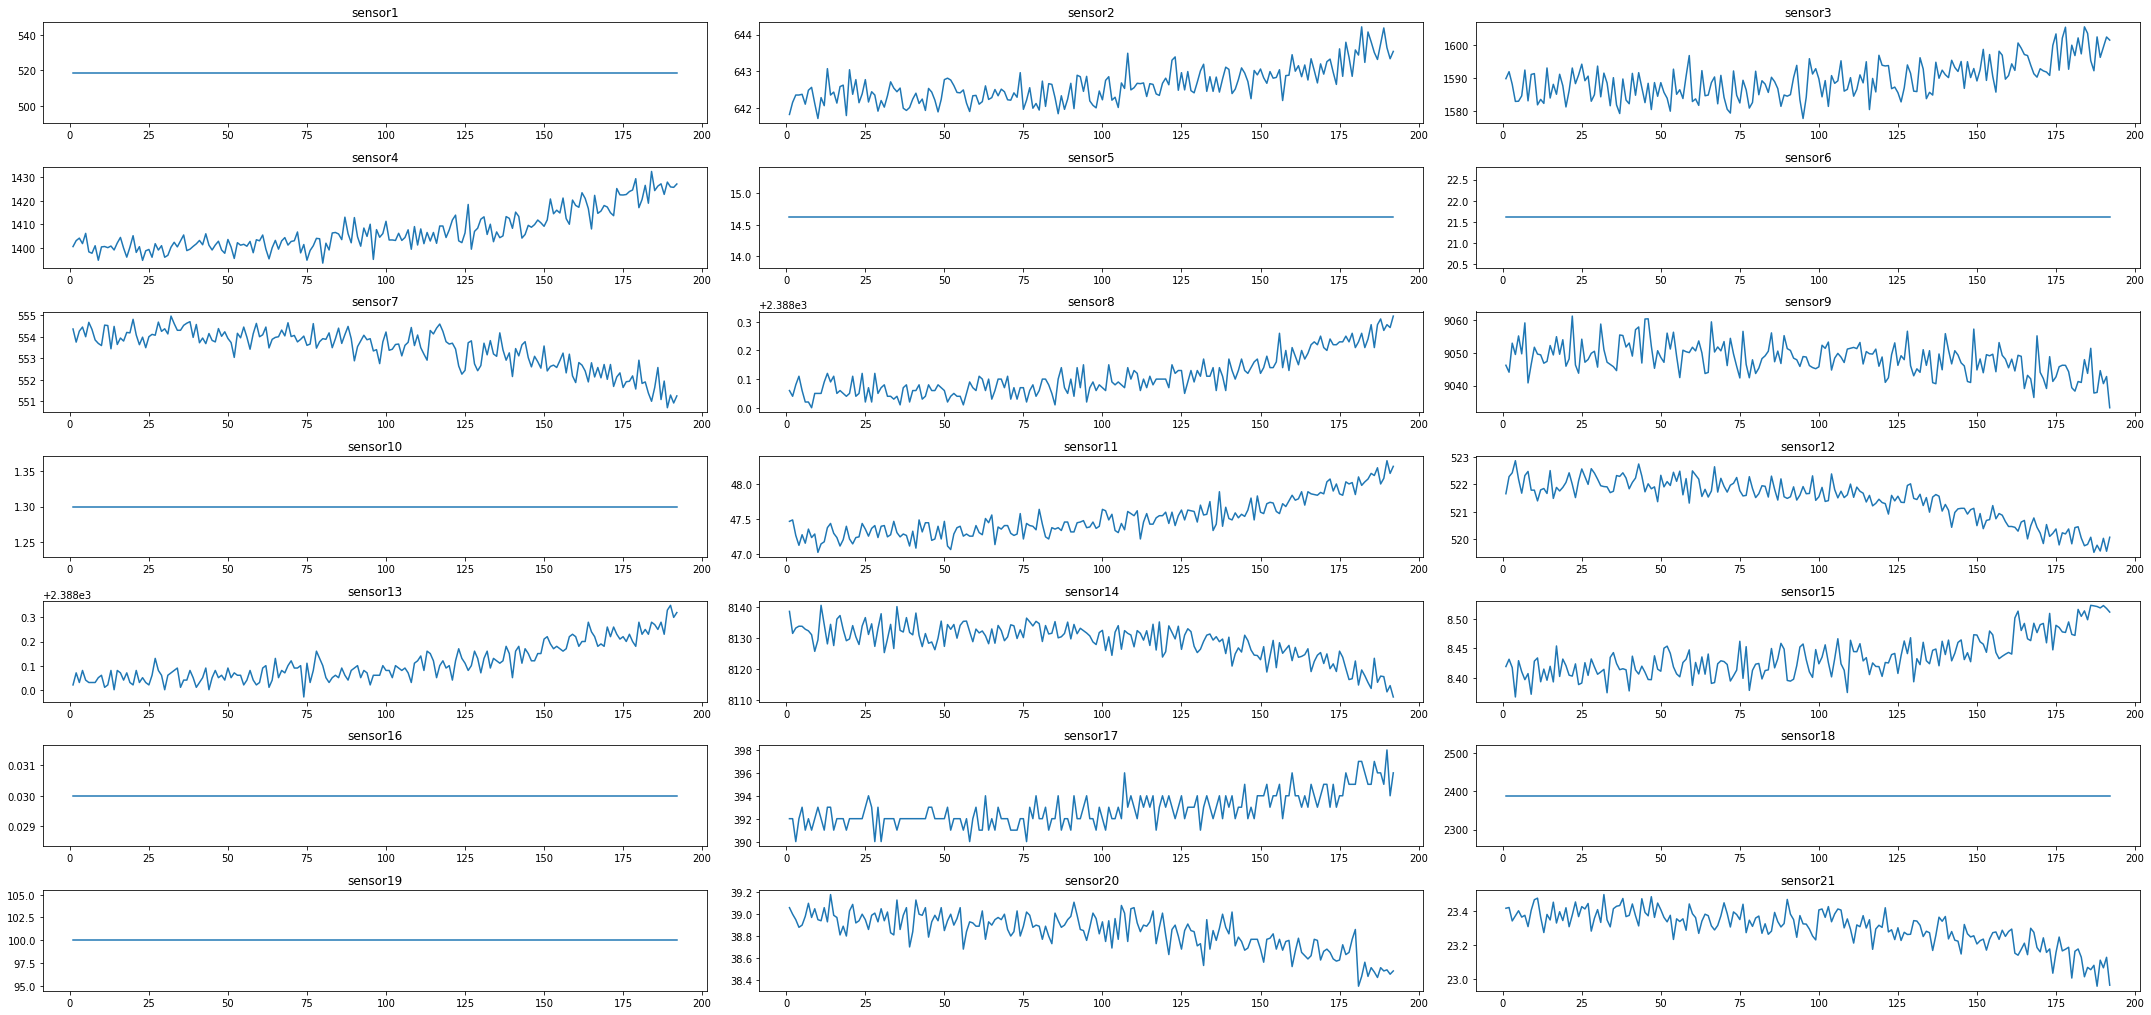

In [12]:
plotSensorDataOfId(train, 1)

In [13]:
def plotDataDistribution(data):
    sensors = []
    plt.figure(figsize=(30, 10))
    for i in range(21):
        sensor = 'sensor'+str(i+1)
        if(len(data[sensor].unique())>1):
            sensors.append(sensor)
            plt.subplot(3, 10, i+1)
            sns.distplot(data[sensor])
    plt.tight_layout()
    return sensors
'''
这个函数的作用是绘制数据集中各传感器数据的分布图，并返回有多个取值的传感器列表。

函数的处理过程如下：

创建一个空列表 sensors，用于存储有多个取值的传感器名称。

创建一个图形窗口，大小为 30x10。

使用循环遍历传感器编号（从 1 到 21）。

根据传感器编号构建传感器名称，存储在变量 sensor 中。

判断当前传感器数据是否有多个唯一值。若有，则将传感器名称添加到 sensors 列表中，并进行后续操作；若没有，则跳过当前传感器。

在图形窗口中创建子图，每行显示 10 个子图。

使用 Seaborn 的 sns.distplot() 函数绘制当前传感器数据的分布图。

使用 plt.tight_layout() 函数调整子图的布局，使其更加紧凑。

返回具有多个取值的传感器名称列表 sensors。

最终会得到一个绘制了数据集中各传感器数据分布图的图形窗口，并返回具有多个取值的传感器列表。

总结起来，该函数的主要功能是绘制数据集中各传感器数据的分布图，并返回具有多个取值的传感器名称列表。
'''

'\n这个函数的作用是绘制数据集中各传感器数据的分布图，并返回有多个取值的传感器列表。\n\n函数的处理过程如下：\n\n创建一个空列表 sensors，用于存储有多个取值的传感器名称。\n\n创建一个图形窗口，大小为 30x10。\n\n使用循环遍历传感器编号（从 1 到 21）。\n\n根据传感器编号构建传感器名称，存储在变量 sensor 中。\n\n判断当前传感器数据是否有多个唯一值。若有，则将传感器名称添加到 sensors 列表中，并进行后续操作；若没有，则跳过当前传感器。\n\n在图形窗口中创建子图，每行显示 10 个子图。\n\n使用 Seaborn 的 sns.distplot() 函数绘制当前传感器数据的分布图。\n\n使用 plt.tight_layout() 函数调整子图的布局，使其更加紧凑。\n\n返回具有多个取值的传感器名称列表 sensors。\n\n最终会得到一个绘制了数据集中各传感器数据分布图的图形窗口，并返回具有多个取值的传感器列表。\n\n总结起来，该函数的主要功能是绘制数据集中各传感器数据的分布图，并返回具有多个取值的传感器名称列表。\n'

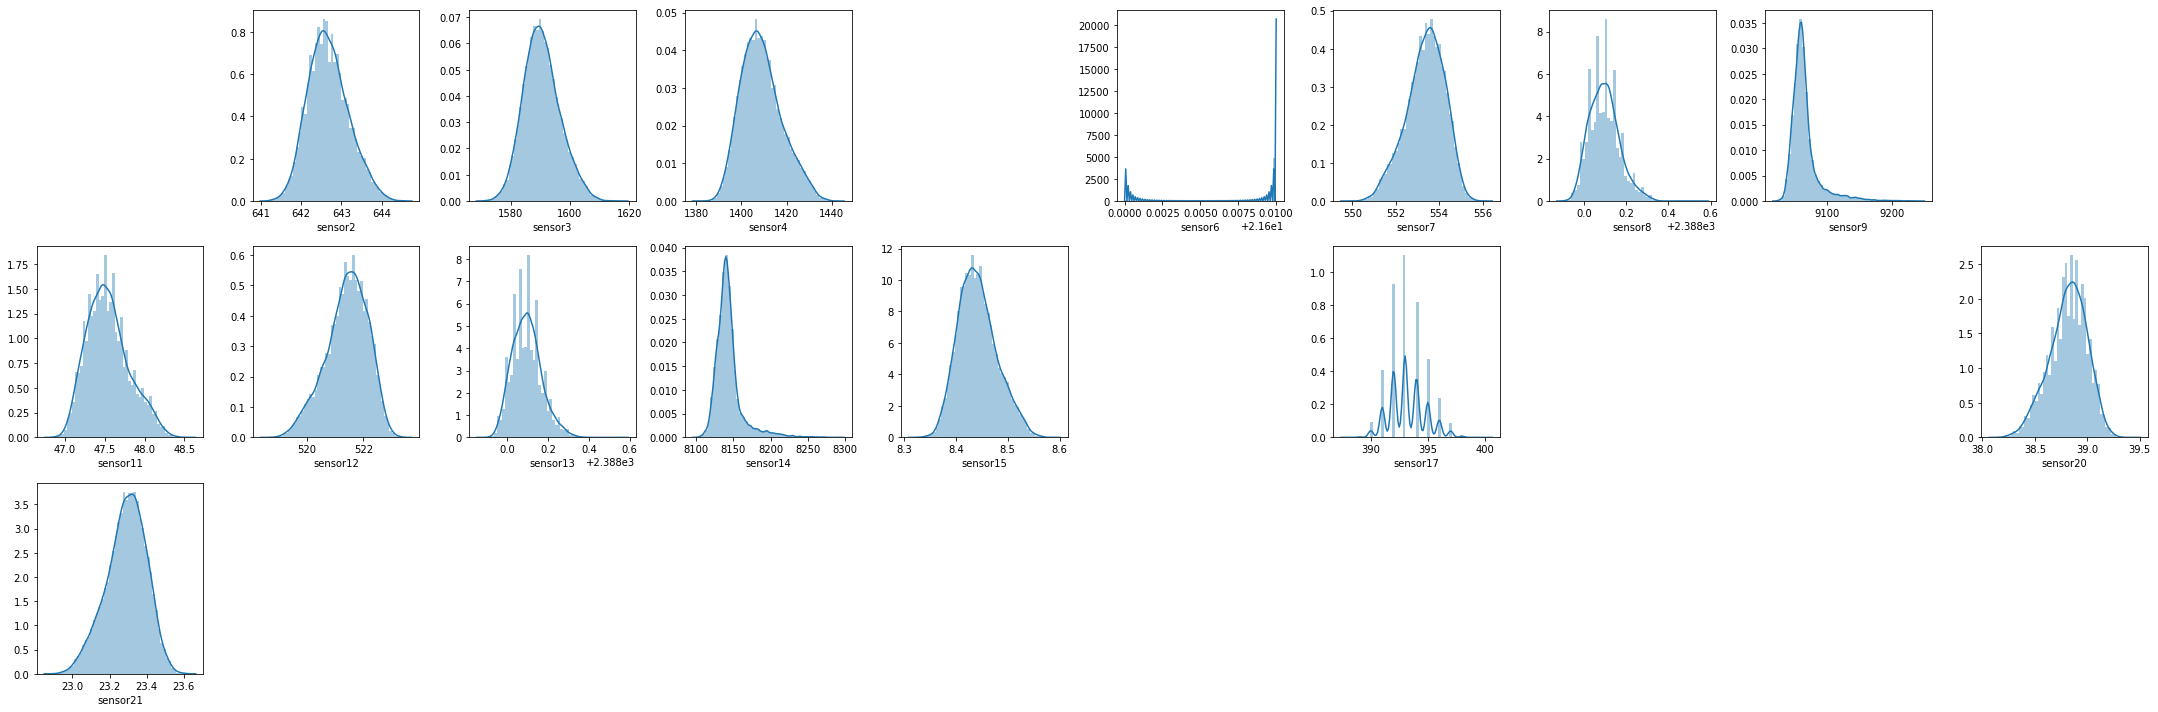

In [14]:
# As of feature selection they often select: 7, 8, 9, 12, 16, 17, 20 => Why 16?
cols = plotDataDistribution(train)

In [15]:
def plotCorrelation(data):
    corr = data.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10, 10))
    sns.heatmap(data.corr(), square=True, mask=mask, cbar_kws={"shrink": 0.5})
'''
这个函数的作用是绘制数据集中各传感器数据之间的相关性热力图。

函数的处理过程如下：

计算数据集的相关系数矩阵，存储在变量 corr 中。

创建一个与 corr 矩阵大小相同的布尔矩阵 mask，并将其所有元素设置为 False。

使用 np.triu_indices_from() 函数生成一个上三角部分为 True 的掩码（mask），将其赋值给 mask。

创建一个图形窗口，大小为 10x10。

使用 Seaborn 的 sns.heatmap() 函数绘制相关系数矩阵的热力图。

设置 square=True，使热力图的格子为正方形。

设置 mask=mask，使用前面生成的掩码(mask)，只显示上三角部分的相关性。

设置 cbar_kws={"shrink": 0.5}，调整颜色条的大小。

最终会得到一个绘制了数据集中各传感器数据之间相关性的热力图的图形窗口。

总结起来，该函数的主要功能是绘制数据集中各传感器数据之间的相关性热力图。
'''

'\n这个函数的作用是绘制数据集中各传感器数据之间的相关性热力图。\n\n函数的处理过程如下：\n\n计算数据集的相关系数矩阵，存储在变量 corr 中。\n\n创建一个与 corr 矩阵大小相同的布尔矩阵 mask，并将其所有元素设置为 False。\n\n使用 np.triu_indices_from() 函数生成一个上三角部分为 True 的掩码（mask），将其赋值给 mask。\n\n创建一个图形窗口，大小为 10x10。\n\n使用 Seaborn 的 sns.heatmap() 函数绘制相关系数矩阵的热力图。\n\n设置 square=True，使热力图的格子为正方形。\n\n设置 mask=mask，使用前面生成的掩码(mask)，只显示上三角部分的相关性。\n\n设置 cbar_kws={"shrink": 0.5}，调整颜色条的大小。\n\n最终会得到一个绘制了数据集中各传感器数据之间相关性的热力图的图形窗口。\n\n总结起来，该函数的主要功能是绘制数据集中各传感器数据之间的相关性热力图。\n'

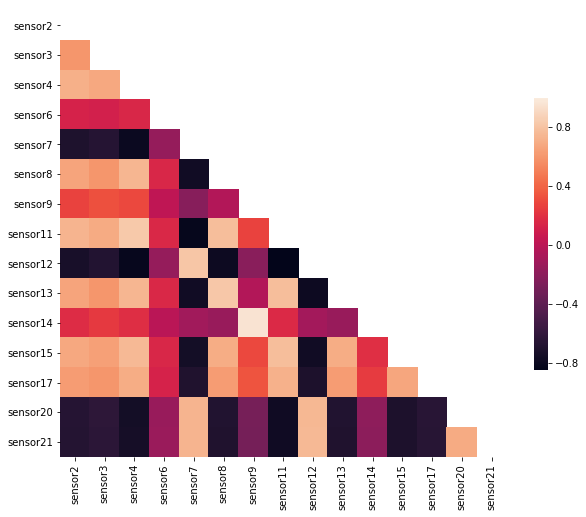

In [16]:
plotCorrelation(train[cols])

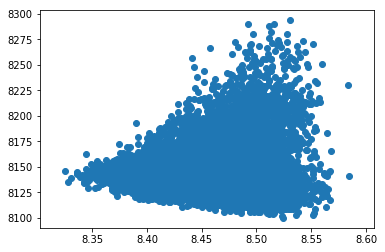

In [17]:
plt.scatter(train['sensor15'].values, train['sensor14'].values)

In [18]:
def plotCorrelationOfID(data, mcId):
    data1 = data[data['id']==mcId]
    data1 = data1.drop(['id'], axis = 1)
    corr = data1.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10, 10))
    sns.heatmap(data1.corr(), square=True, mask=mask, cbar_kws={"shrink": 0.5})
'''
这个函数的作用是绘制数据集中特定传感器与其他传感器之间的相关性热力图。

函数的处理过程如下：

根据传入的传感器ID mcId，从数据集中筛选出该传感器对应的数据，并存储在变量 data1 中。

从 data1 数据中删除 'id' 列，使用 drop() 函数，得到最终用于计算相关系数的数据集。

计算 data1 数据集的相关系数矩阵，存储在变量 corr 中。

创建一个与 corr 矩阵大小相同的布尔矩阵 mask，并将其所有元素设置为 False。

使用 np.triu_indices_from() 函数生成一个上三角部分为 True 的掩码（mask），将其赋值给 mask。

创建一个图形窗口，大小为 10x10。

使用 Seaborn 的 sns.heatmap() 函数绘制相关系数矩阵的热力图。

设置 square=True，使热力图的格子为正方形。

设置 mask=mask，使用前面生成的掩码(mask)，只显示上三角部分的相关性。

设置 cbar_kws={"shrink": 0.5}，调整颜色条的大小。

最终会得到一个绘制了特定传感器与其他传感器之间相关性的热力图的图形窗口。

总结起来，该函数的主要功能是绘制数据集中特定传感器与其他传感器之间的相关性热力图。
'''

'\n这个函数的作用是绘制数据集中特定传感器与其他传感器之间的相关性热力图。\n\n函数的处理过程如下：\n\n根据传入的传感器ID mcId，从数据集中筛选出该传感器对应的数据，并存储在变量 data1 中。\n\n从 data1 数据中删除 \'id\' 列，使用 drop() 函数，得到最终用于计算相关系数的数据集。\n\n计算 data1 数据集的相关系数矩阵，存储在变量 corr 中。\n\n创建一个与 corr 矩阵大小相同的布尔矩阵 mask，并将其所有元素设置为 False。\n\n使用 np.triu_indices_from() 函数生成一个上三角部分为 True 的掩码（mask），将其赋值给 mask。\n\n创建一个图形窗口，大小为 10x10。\n\n使用 Seaborn 的 sns.heatmap() 函数绘制相关系数矩阵的热力图。\n\n设置 square=True，使热力图的格子为正方形。\n\n设置 mask=mask，使用前面生成的掩码(mask)，只显示上三角部分的相关性。\n\n设置 cbar_kws={"shrink": 0.5}，调整颜色条的大小。\n\n最终会得到一个绘制了特定传感器与其他传感器之间相关性的热力图的图形窗口。\n\n总结起来，该函数的主要功能是绘制数据集中特定传感器与其他传感器之间的相关性热力图。\n'

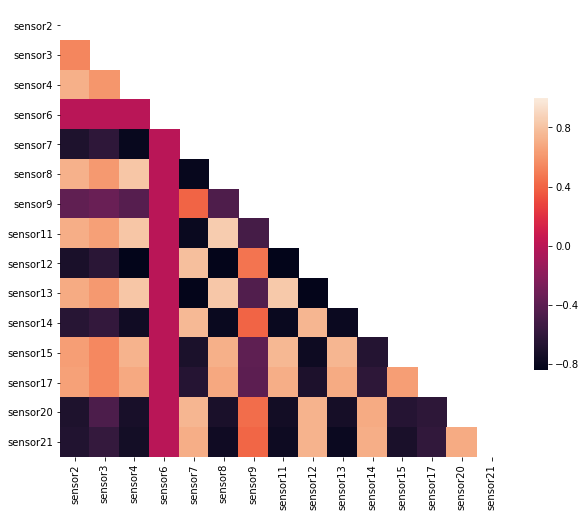

In [19]:
plotCorrelationOfID(train[['id']+cols], 1)

# Scale

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Scale the data and return the scaled data in form of a df and the scaler (will generate the scaler if doesn't pass it)
def scaleData(data, scaler=None):
    scaled_fields = setting_cols+sensor_cols
    if scaler == None:
        scaler = StandardScaler().fit(data[scaled_fields].values)
#         scaler = MinMaxScaler().fit(data[scaled_fields].values)
    scaled_data = scaler.transform(data[scaled_fields].values)
    scaled_df0 = pd.DataFrame(scaled_data)
    scaled_df0.columns = scaled_fields
    scaled_df1 = data.copy()
    for i in range(len(scaled_fields)):
        theField = scaled_fields[i]
        scaled_df1[theField] = scaled_df0[theField]
    return scaled_df1, scaler
'''
这个函数的作用是对数据进行标准化处理，并返回标准化后的数据和标准化器（如果未传入标准化器，则生成一个标准化器）。

函数的处理过程如下：

首先将需要进行标准化处理的字段列表存储在变量 scaled_fields 中，该列表包括 setting_cols 和 sensor_cols。

如果未传入标准化器 scaler，则创建一个 StandardScaler 标准化器，并使用数据集中的 scaled_fields 字段进行拟合（fit）。

使用标准化器 scaler 对数据集中的 scaled_fields 字段进行标准化转换（transform），得到标准化后的数据 scaled_data。

创建一个新的数据框 scaled_df0，将标准化后的数据 scaled_data 转换为数据框的形式，并设置列名为 scaled_fields。

创建一个数据框 scaled_df1，并将原始数据 data 复制给它。

遍历 scaled_fields 列表，对于每个字段，将 scaled_df0 中对应的列复制给 scaled_df1 中相应的字段。

返回标准化后的数据框 scaled_df1 和标准化器 scaler。

总结起来，该函数的主要功能是对数据进行标准化处理，并返回标准化后的数据以及用于标准化的标准化器（如果未传入标准化器，则生成一个标准化器）。
'''

'\n这个函数的作用是对数据进行标准化处理，并返回标准化后的数据和标准化器（如果未传入标准化器，则生成一个标准化器）。\n\n函数的处理过程如下：\n\n首先将需要进行标准化处理的字段列表存储在变量 scaled_fields 中，该列表包括 setting_cols 和 sensor_cols。\n\n如果未传入标准化器 scaler，则创建一个 StandardScaler 标准化器，并使用数据集中的 scaled_fields 字段进行拟合（fit）。\n\n使用标准化器 scaler 对数据集中的 scaled_fields 字段进行标准化转换（transform），得到标准化后的数据 scaled_data。\n\n创建一个新的数据框 scaled_df0，将标准化后的数据 scaled_data 转换为数据框的形式，并设置列名为 scaled_fields。\n\n创建一个数据框 scaled_df1，并将原始数据 data 复制给它。\n\n遍历 scaled_fields 列表，对于每个字段，将 scaled_df0 中对应的列复制给 scaled_df1 中相应的字段。\n\n返回标准化后的数据框 scaled_df1 和标准化器 scaler。\n\n总结起来，该函数的主要功能是对数据进行标准化处理，并返回标准化后的数据以及用于标准化的标准化器（如果未传入标准化器，则生成一个标准化器）。\n'

In [22]:
# Scaled train
scaled_train, scaler = scaleData(train)
# Scaled test
scaled_test, scaler = scaleData(test, scaler)

# Plot to check the distribution are still the same after scaling

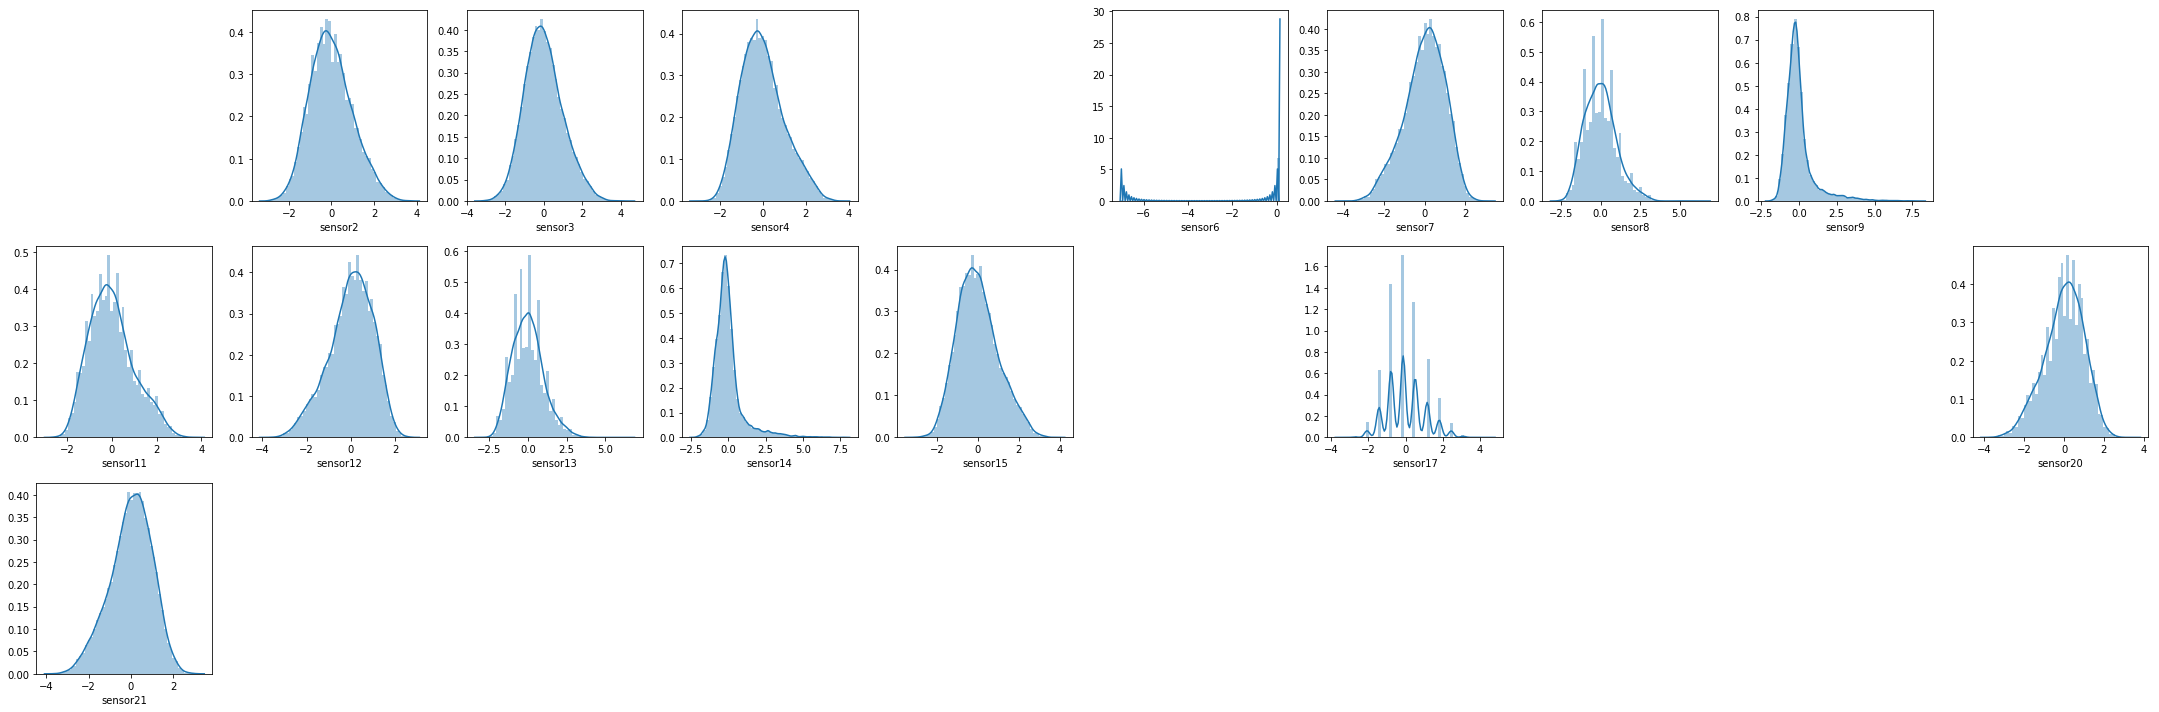

In [23]:
# plot to make sure that the scaled data still keep its shape.
cols = plotDataDistribution(scaled_train)

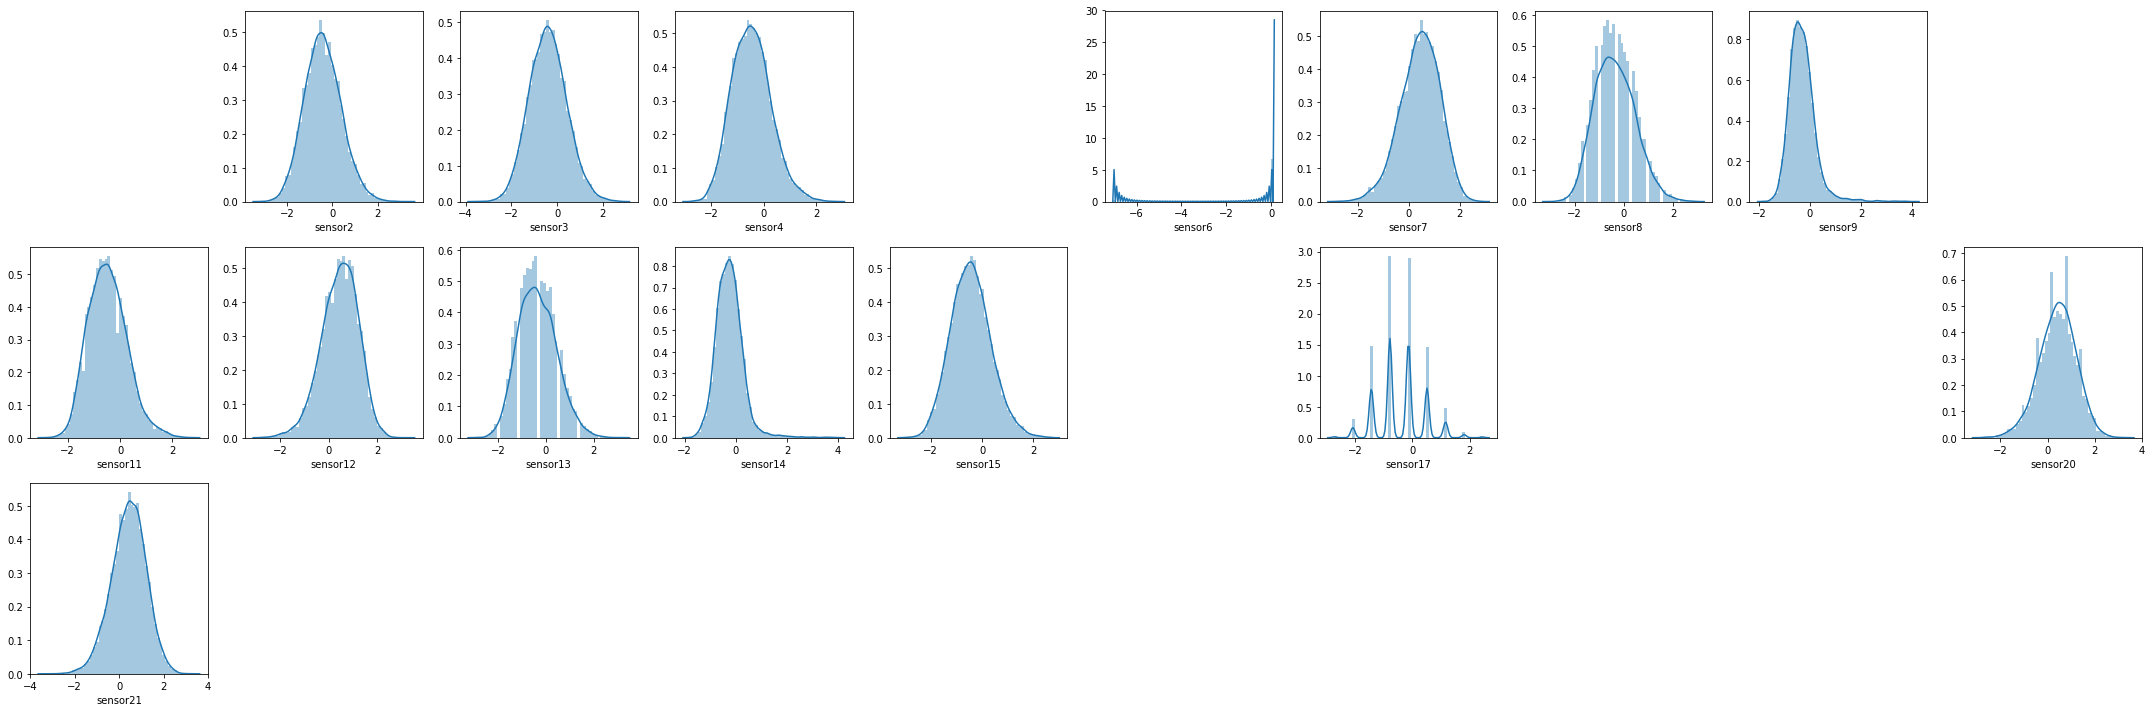

In [24]:
#plot to see if the data keeps its distribution
cols = plotDataDistribution(scaled_test)

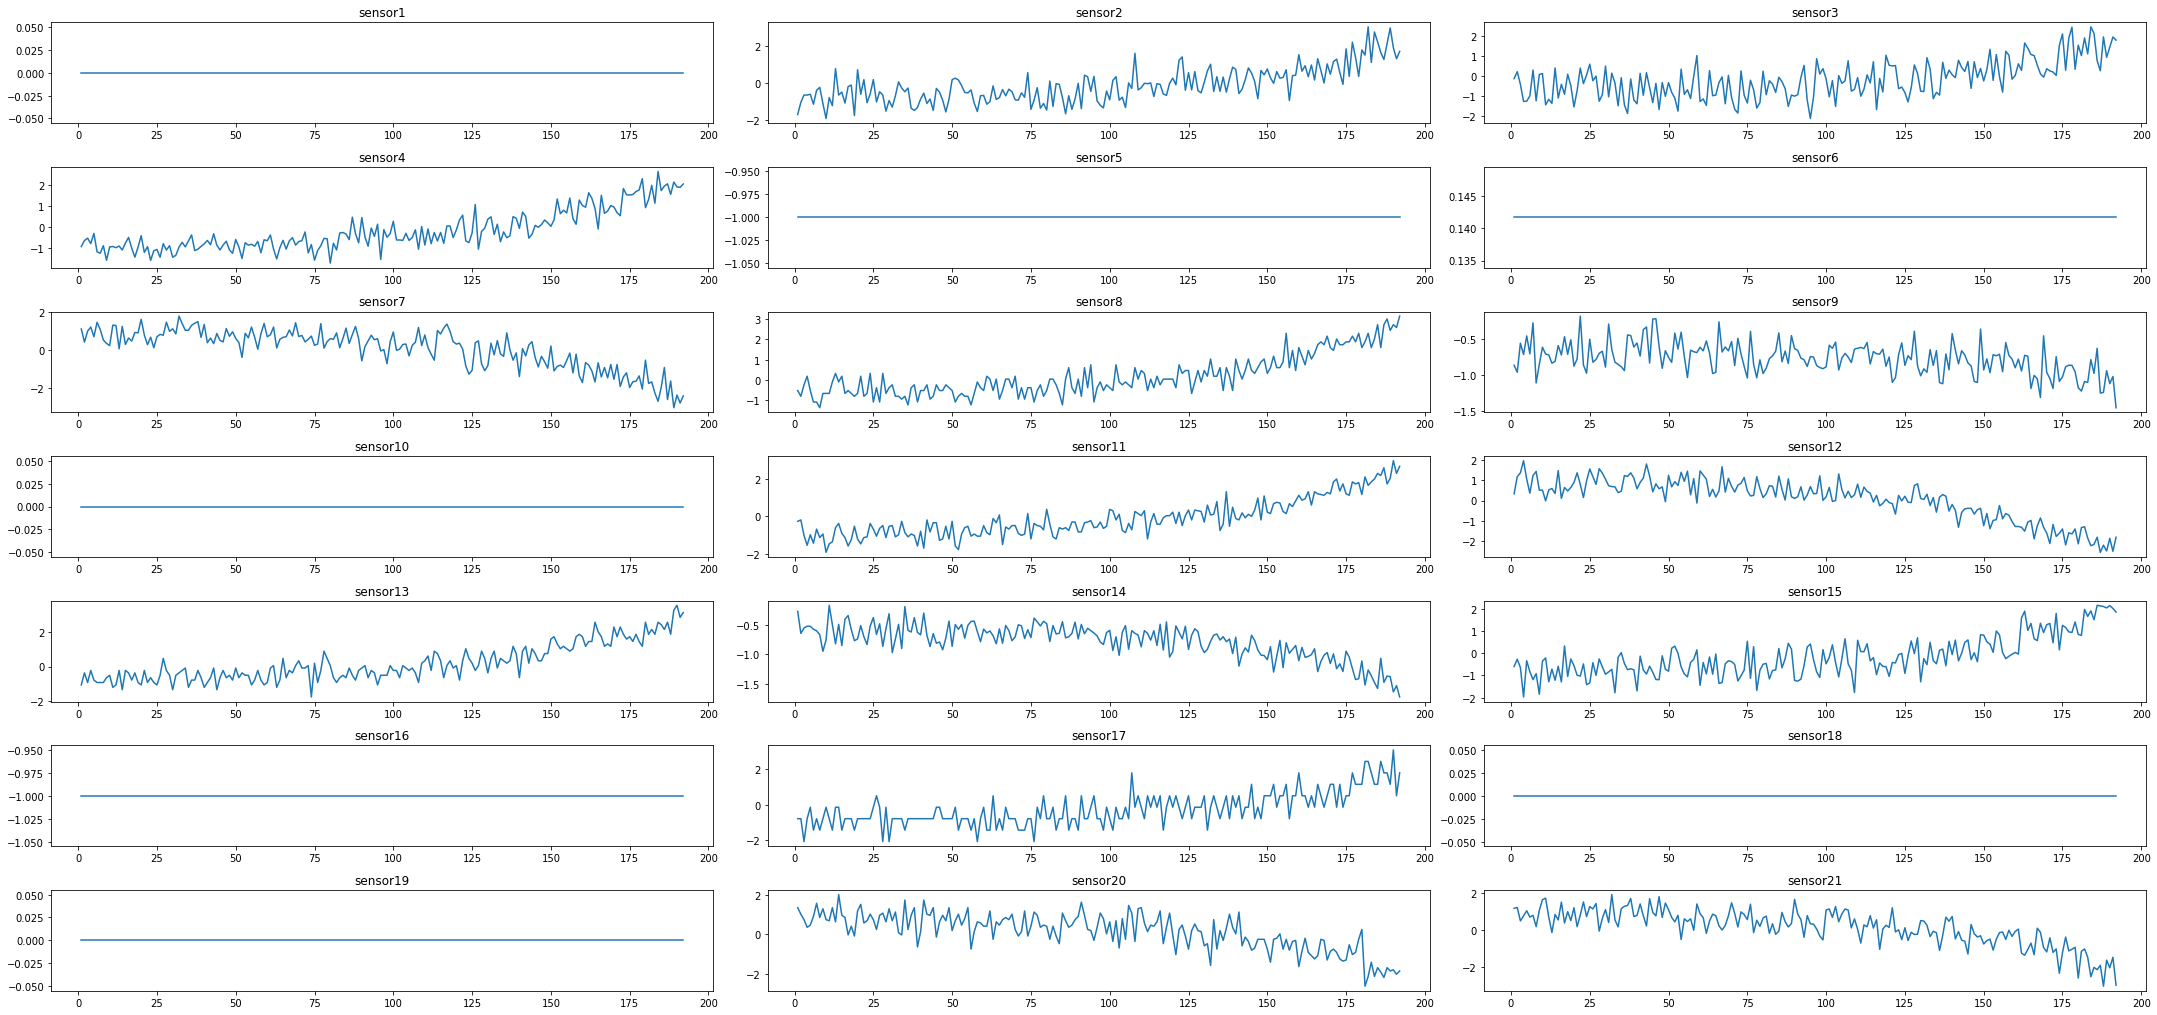

In [25]:
plotSensorDataOfId(scaled_train, 1)

# Piece-wise data (all columns in order) with augmentation and padded sequence

In [26]:
import random
def getPieceWiseData(data, augmentStartCycle=None, augmentEndCycle=None, movingAverage=None):
    uniqueIds = data['id'].unique()
    if movingAverage==None:
        result = [data[data['id']==mId].values for mId in uniqueIds]
    else:
        result = [data[data['id']==mId].rolling(movingAverage).mean().dropna().values for mId in uniqueIds]
    maxlen = np.max([len(x) for x in result])
    #Augment the data now
    if(augmentStartCycle!=None and augmentEndCycle!= None):
        result1 = []
        for mc in result:
            maxCycle = len(mc)
            for i in range(50):
                idx = random.randint(max([maxCycle-145, 10]), max([maxCycle-10, 10]))
                if(len(mc[:idx, :])>0):
                    result1.append(mc[:idx, :])
            #Also add the complete sequence.
#             result1.append(mc)
        result = result1
    # calculate the ruls (-1) is the last column for RUL
    ruls = [min(mc[:, -1]) for mc in result]
    return result,ruls, maxlen
'''
这个函数的作用是根据给定的数据生成分段数据，并返回分段数据、剩余使用寿命（RUL）和最大长度。

函数的处理过程如下：

首先获取数据中唯一的传感器ID，存储在变量 uniqueIds 中。

如果未指定移动平均值 movingAverage，则将每个传感器ID对应的数据存储在 result 列表中，即 data[data['id']==mId].values。

如果指定了移动平均值 movingAverage，则对每个传感器ID对应的数据进行移动平均计算，使用 rolling().mean() 方法计算移动平均，并使用 dropna() 方法删除计算结果中的NaN值，最后将结果存储在 result 列表中。

计算 result 列表中每个传感器ID对应的数据的最大长度，并存储在变量 maxlen 中。

如果指定了 augmentStartCycle 和 augmentEndCycle，则进行数据增强。

对于每个传感器ID对应的数据，随机选择一个索引位置 idx，该索引位置范围从 max([maxCycle-145, 10]) 到 max([maxCycle-10, 10])（确保所选的分段长度在合理范围内）。

如果分段长度大于0，则将分段数据 mc[:idx, :] 添加到 result1 列表中。

最后将完整的序列数据 mc 添加到 result1 列表中。

将增强后的分段数据列表 result1 赋值给 result。

对于每个传感器ID对应的数据，计算剩余使用寿命（RUL）的最小值，并存储在 ruls 列表中。

返回分段数据列表 result、剩余使用寿命（RUL）列表 ruls 和最大长度 maxlen。

总结起来，该函数的主要功能是根据给定的数据生成分段数据，并返回分段数据、剩余使用寿命（RUL）和最大长度。如果指定了数据的移动平均值和增强范围，则还会进行相应的处理。
'''
# Use this last one only (prev one is a helper)
from keras.preprocessing.sequence import pad_sequences
def getPaddedSequence(data, pad_type='pre', maxlen=None, augmentStartCycle=None, augmentEndCycle=None, movingAverage=None):
    piece_wise, ruls, ml = getPieceWiseData(data, augmentStartCycle, augmentEndCycle, movingAverage)
    if(maxlen==None): maxlen = ml
    padded_sequence = pad_sequences(piece_wise, padding=pad_type, maxlen=maxlen, dtype='float32')
    return padded_sequence, ruls, maxlen
'''
这段代码定义了一个名为getPaddedSequence的函数，该函数用于获取填充后的序列数据。

函数的处理过程如下：

调用之前定义的getPieceWiseData函数来获得分段数据piece_wise、剩余使用寿命（RUL）列表ruls和最大长度ml。
如果未指定最大长度maxlen，则将其赋值为ml。
使用pad_sequences函数对分段数据piece_wise进行填充，设置填充类型为pad_type（默认为前填充），填充的最大长度为maxlen，数据类型为float32。
返回填充后的序列数据padded_sequence、剩余使用寿命（RUL）列表ruls和最大长度maxlen。
总结起来，该函数的功能是根据给定的数据获取填充后的序列数据，并返回填充后的序列数据、剩余使用寿命（RUL）列表和最大长度。
'''

Using TensorFlow backend.


'\n这段代码定义了一个名为getPaddedSequence的函数，该函数用于获取填充后的序列数据。\n\n函数的处理过程如下：\n\n调用之前定义的getPieceWiseData函数来获得分段数据piece_wise、剩余使用寿命（RUL）列表ruls和最大长度ml。\n如果未指定最大长度maxlen，则将其赋值为ml。\n使用pad_sequences函数对分段数据piece_wise进行填充，设置填充类型为pad_type（默认为前填充），填充的最大长度为maxlen，数据类型为float32。\n返回填充后的序列数据padded_sequence、剩余使用寿命（RUL）列表ruls和最大长度maxlen。\n总结起来，该函数的功能是根据给定的数据获取填充后的序列数据，并返回填充后的序列数据、剩余使用寿命（RUL）列表和最大长度。\n'

In [27]:
augmentStartCycle = 130
augmentEndCycle = 362
maxlen=200
movingAverage = None
padded_train, train_ruls, maxlen = getPaddedSequence(scaled_train, maxlen=maxlen, augmentStartCycle=augmentStartCycle, augmentEndCycle=augmentEndCycle, movingAverage=movingAverage)
padded_test, test_ruls, maxlen = getPaddedSequence(scaled_test, maxlen=maxlen, movingAverage=movingAverage)

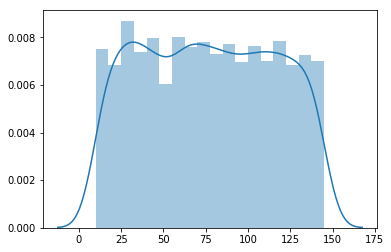

In [28]:
sns.distplot(train_ruls)

# Plot data to see if it is smoothened.

In [29]:
def plotDataForIndex(data, theIndex):
    plt.figure(figsize=(30, 30))
    for i in range(5, 26):
        plt.subplot(7, 3, i-4)
        values = data[theIndex][:, i]
        plt.plot(range(len(values)) ,values)
        plt.title('sensor'+str(i-4))
        plt.tight_layout()
'''
这段代码定义了一个名为plotDataForIndex的函数，该函数用于绘制指定索引位置的数据。

函数的处理过程如下：

创建一个图形窗口，设置其大小为(30, 30)，使用plt.figure(figsize=(30, 30))语句实现。

使用循环从5到26遍历，对每个传感器ID进行绘制。

在一个7行3列的子图中，使用plt.subplot(7, 3, i-4)语句指定当前子图的位置。

从数据中获取给定索引位置的传感器数据，即values = data[theIndex][:, i]。

使用plt.plot(range(len(values)), values)语句绘制传感器数据的曲线图，横轴是数据的索引，纵轴是数据的值。

使用plt.title('sensor'+str(i-4))语句给当前子图添加标题，标题内容为"sensor"加上传感器ID。

使用plt.tight_layout()语句调整子图的布局，使其更加紧凑。

总结起来，该函数的功能是根据给定的数据和索引位置，绘制该索引位置对应的传感器数据的曲线图，并以每行3个子图的方式展示。
'''

'\n这段代码定义了一个名为plotDataForIndex的函数，该函数用于绘制指定索引位置的数据。\n\n函数的处理过程如下：\n\n创建一个图形窗口，设置其大小为(30, 30)，使用plt.figure(figsize=(30, 30))语句实现。\n\n使用循环从5到26遍历，对每个传感器ID进行绘制。\n\n在一个7行3列的子图中，使用plt.subplot(7, 3, i-4)语句指定当前子图的位置。\n\n从数据中获取给定索引位置的传感器数据，即values = data[theIndex][:, i]。\n\n使用plt.plot(range(len(values)), values)语句绘制传感器数据的曲线图，横轴是数据的索引，纵轴是数据的值。\n\n使用plt.title(\'sensor\'+str(i-4))语句给当前子图添加标题，标题内容为"sensor"加上传感器ID。\n\n使用plt.tight_layout()语句调整子图的布局，使其更加紧凑。\n\n总结起来，该函数的功能是根据给定的数据和索引位置，绘制该索引位置对应的传感器数据的曲线图，并以每行3个子图的方式展示。\n'

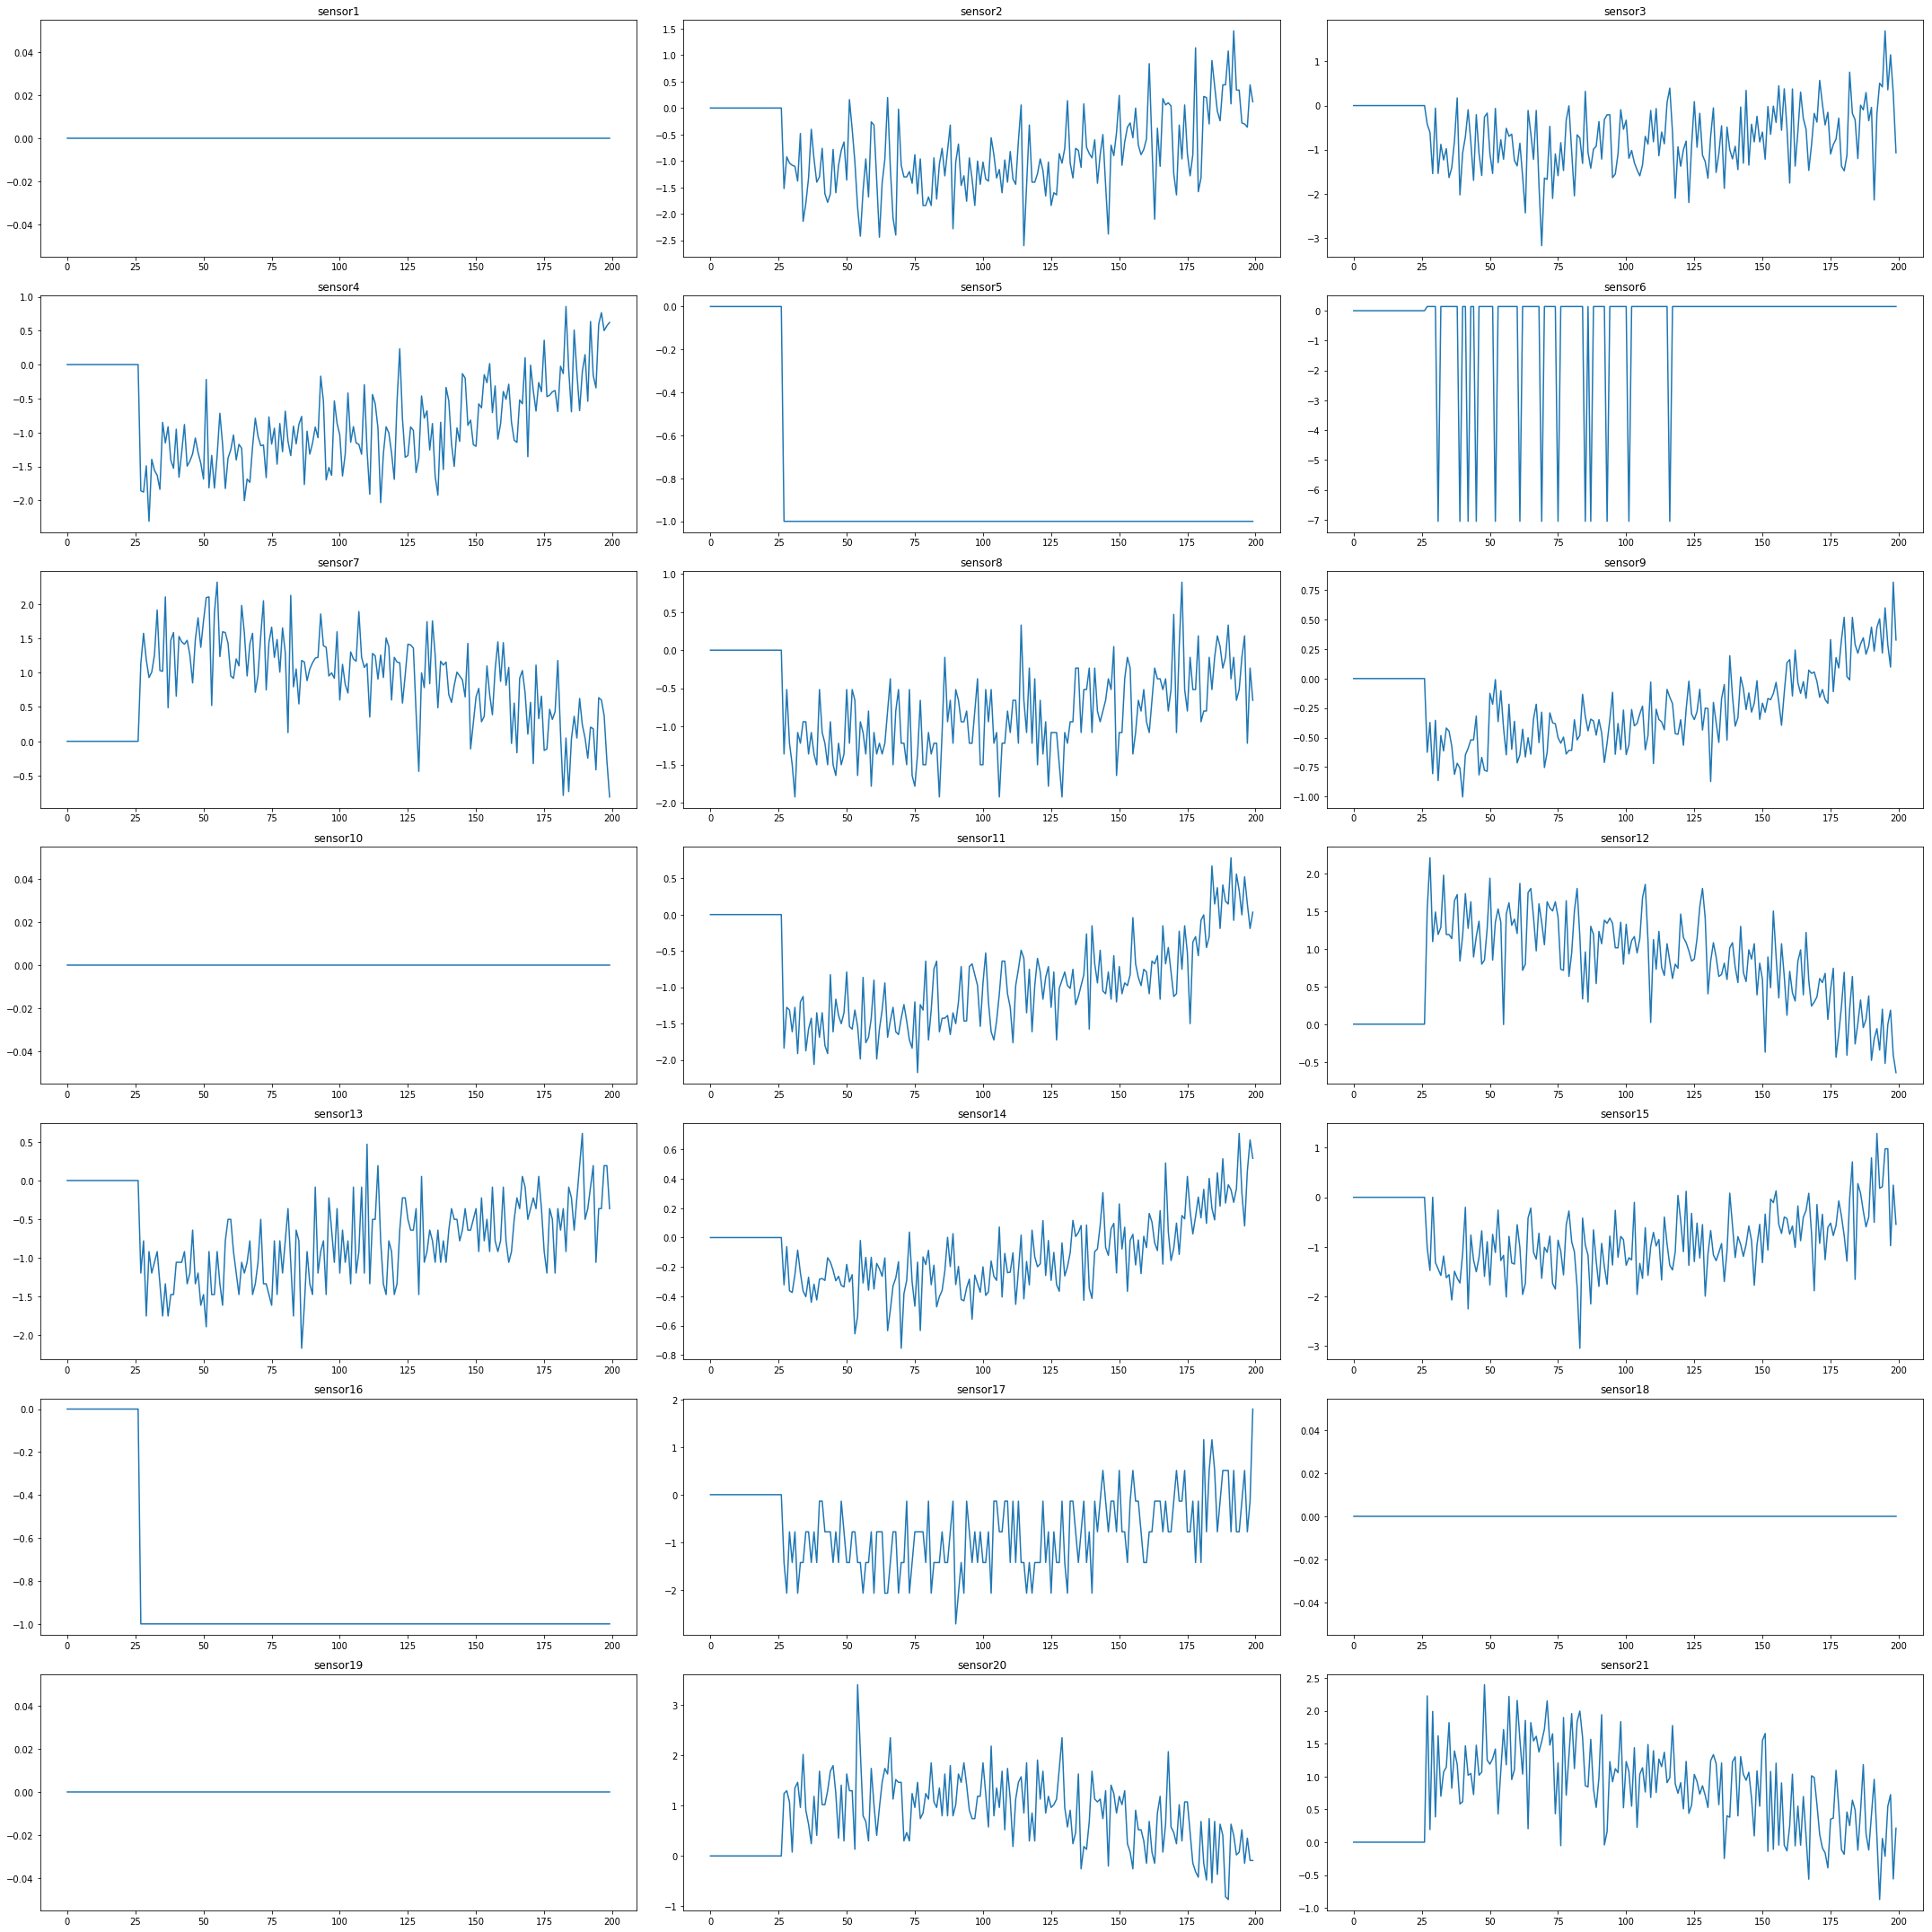

In [30]:
plotDataForIndex(padded_train, 450)

# Select sensors

In [31]:
# selected_sensors = [7, 8, 9, 12, 16, 17, 20]
selected_sensors = [2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, 21]
# selected_sensors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
selected_sensors_indices = [x-1 for x in selected_sensors] # -1 because the index starts from 1

# Train test data

In [32]:
# X_train = padded_train[:, :, 5:26]
X_train = padded_train[:, :, 5:26][:, :, selected_sensors_indices]

In [33]:
# X_test = padded_test[:, :, 5:26]
X_test = padded_test[:, :, 5:26][:, :, selected_sensors_indices]

In [34]:
y_train = np.array(train_ruls).reshape(-1,1)
y_test = np.array(test_ruls).reshape(-1,1)

In [35]:
numOfSensors = len(X_train[0][0])

# Exporting and downloading data

In [36]:
import codecs, json
def exportNPArrayToJSON(a, fileName):
    b = a.tolist() # nested lists with same data, indices
    json.dump(b, codecs.open(fileName, 'w', encoding='utf-8')) ### this saves the array in .json format

In [37]:
test_FD = 'test_FD00' + str(setNumber) + ".json"
train_FD = 'train_FD00' + str(setNumber) + ".json"
test_RUL_FD = 'test_RUL_FD00' + str(setNumber) + ".json"
train_RUL_FD = 'train_RUL_FD00' + str(setNumber) + ".json"
# exportNPArrayToJSON(X_train, train_FD)
exportNPArrayToJSON(X_test, test_FD)
# exportNPArrayToJSON(y_train, train_RUL_FD)
exportNPArrayToJSON(y_test, test_RUL_FD)

In [38]:
from IPython.display import FileLink

In [39]:
FileLink(test_FD)

/kaggle/working/test_FD001.json

In [40]:
FileLink(train_FD)

/kaggle/working/train_FD001.json

In [41]:
FileLink(test_RUL_FD)

/kaggle/working/test_RUL_FD001.json

In [42]:
FileLink(train_RUL_FD)

/kaggle/working/train_RUL_FD001.json

# LSTM Model

In [43]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten

# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=36, inter_op_parallelism_threads=36)))


def createModel(l1Nodes, l2Nodes, d1Nodes, d2Nodes, inputShape):
    # input layer
    lstm1 = LSTM(l1Nodes, input_shape=inputShape, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do1 = Dropout(0.2)
    
    lstm2 = LSTM(l2Nodes, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do2 = Dropout(0.2)
    
    flatten = Flatten()
    
    dense1 = Dense(d1Nodes, activation='relu', kernel_regularizer=regularizers.l2(0.1))
    do3 = Dropout(0.2)
    
    dense2 = Dense(d2Nodes, activation='relu', kernel_regularizer=regularizers.l2(0.1))
    do4 = Dropout(0.2)
    
    # output layer
    outL = Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.1))
    # combine the layers
#     layers = [lstm1, do1, lstm2, do2, dense1, do3, dense2, do4, outL]
    layers = [lstm1, lstm2, do2, flatten,  dense1, dense2, outL]
    # create the model
    model = Sequential(layers)
    model.compile(optimizer='adam', loss='mse')
    return model
'''
这段代码定义了一个名为createModel的函数，该函数用于创建一个特定结构的神经网络模型。

函数的处理过程如下：

定义输入层：

使用LSTM层(lstm1)，设置节点数量为l1Nodes，输入形状为inputShape，设置返回完整序列(return_sequences=True)，并采用L2正则化(kernel_regularizer=regularizers.l2(0.1))。
使用Dropout层(do1)，设置丢失率为0.2。
定义另一个LSTM层(lstm2)，设置节点数量为l2Nodes，返回完整序列，采用相同的L2正则化设置。

定义Flatten层(flatten)，将输入展平。

定义两个全连接层(dense1和dense2)，使用ReLU激活函数，设置节点数量分别为d1Nodes和d2Nodes，并采用L2正则化设置。

定义两个Dropout层(do3和do4)，设置丢失率为0.2。

定义输出层(outL)，使用ReLU激活函数，单个节点，采用L2正则化设置。

将所有层按照顺序组合到一个列表(layers)中。

使用Sequential模型创建神经网络模型，将列表中的层依次添加到模型中。

使用Adam优化器，均方误差损失函数(loss='mse')来编译模型。

返回创建的模型。

总结起来，该函数的功能是根据给定的节点数量和输入形状，创建一个具有LSTM层、Dropout层、全连接层和输出层的神经网络模型，并使用Adam优化器和均方误差损失函数进行编译。
'''

"\n这段代码定义了一个名为createModel的函数，该函数用于创建一个特定结构的神经网络模型。\n\n函数的处理过程如下：\n\n定义输入层：\n\n使用LSTM层(lstm1)，设置节点数量为l1Nodes，输入形状为inputShape，设置返回完整序列(return_sequences=True)，并采用L2正则化(kernel_regularizer=regularizers.l2(0.1))。\n使用Dropout层(do1)，设置丢失率为0.2。\n定义另一个LSTM层(lstm2)，设置节点数量为l2Nodes，返回完整序列，采用相同的L2正则化设置。\n\n定义Flatten层(flatten)，将输入展平。\n\n定义两个全连接层(dense1和dense2)，使用ReLU激活函数，设置节点数量分别为d1Nodes和d2Nodes，并采用L2正则化设置。\n\n定义两个Dropout层(do3和do4)，设置丢失率为0.2。\n\n定义输出层(outL)，使用ReLU激活函数，单个节点，采用L2正则化设置。\n\n将所有层按照顺序组合到一个列表(layers)中。\n\n使用Sequential模型创建神经网络模型，将列表中的层依次添加到模型中。\n\n使用Adam优化器，均方误差损失函数(loss='mse')来编译模型。\n\n返回创建的模型。\n\n总结起来，该函数的功能是根据给定的节点数量和输入形状，创建一个具有LSTM层、Dropout层、全连接层和输出层的神经网络模型，并使用Adam优化器和均方误差损失函数进行编译。\n"

In [44]:
model = createModel(64, 64, 64, 8, (maxlen, numOfSensors))

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200, 64)           20480     
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 64)           33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 64)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                819264    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total para

# CNN + LSTM

In [46]:
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

In [47]:
def createCNNLSTMModel(inputShape):
    cv1 = Convolution1D(input_shape=inputShape, filters=18, kernel_size=2, strides=1, padding='same', activation='relu', name='cv1')
    mp1 = MaxPooling1D(pool_size=2, strides=2, padding='same', name = 'mp1')
    
    cv2 = Convolution1D(filters=36, kernel_size=2, strides=1, padding='same', activation='relu', name='cv2')
    mp2 = MaxPooling1D(pool_size=2, strides=2, padding='same', name= 'mp2')
    
    cv3 = Convolution1D(filters=72, kernel_size=2, strides=1, padding='same', activation='relu', name='cv3')
    mp3 = MaxPooling1D(pool_size=2, strides=2, padding='same', name= 'mp3')
    
    d4 = Dense(inputShape[0]*inputShape[1], activation='relu')
    do4 = Dropout(0.2)
    
    lstm5 = LSTM(inputShape[1]*3, return_sequences=True)
    do5 = Dropout(0.2)
    
    lstm6 = LSTM(inputShape[1]*3)
    do6 = Dropout(0.2)
    
    d7 = Dense(50, activation='relu')
    do7 = Dropout(0.2)
    
    dout = Dense(1)
    
    model = Sequential([cv1, mp1, cv2, mp2, cv3, mp3, d4, do4, lstm5, do5, lstm6, do6, d7, do7, dout])
    model.compile(optimizer='rmsprop', loss='mse')
    return model
'''
这段代码定义了一个名为createCNNLSTMModel的函数，该函数用于创建一个结合了卷积神经网络（CNN）和长短期记忆网络（LSTM）的模型。

函数的处理过程如下：

定义卷积层 cv1，使用 Convolution1D 类，设置输入形状为 inputShape，过滤器数量为 18，卷积核大小为 2，步幅为 1，填充方式为 "same"，激活函数为 ReLU。

定义最大池化层 mp1，使用 MaxPooling1D 类，池化窗口大小为 2，步幅为 2，填充方式为 "same"。

定义另一个卷积层 cv2，过滤器数量为 36，其他参数与上一层相同。

定义另一个最大池化层 mp2，与上一层参数相同。

定义另一个卷积层 cv3，过滤器数量为 72，其他参数与上一层相同。

定义另一个最大池化层 mp3，与上一层参数相同。

定义全连接层 d4，使用 Dense 类，设置节点数量为 inputShape[0]*inputShape[1]，激活函数为 ReLU。

定义一个 Dropout 层 do4，设置丢失率为 0.2。

定义一个 LSTM 层 lstm5，设置节点数量为 inputShape[1]*3，返回完整序列。

定义一个 Dropout 层 do5，设置丢失率为 0.2。

定义另一个 LSTM 层 lstm6，设置节点数量为 inputShape[1]*3。

定义另一个 Dropout 层 do6，设置丢失率为 0.2。

定义一个全连接层 d7，设置节点数量为 50，激活函数为 ReLU。

定义一个 Dropout 层 do7，设置丢失率为 0.2。

定义输出层 dout，使用 Dense 类，设置单个节点。

将所有层按照顺序组合到一个列表中。

使用 Sequential 模型创建神经网络模型，将列表中的层依次添加到模型中。

使用 RMSprop 优化器，均方误差损失函数来编译模型。

返回创建的模型。

总结起来，该函数的功能是根据给定的输入形状创建一个结合了卷积神经网络和长短期记忆网络的模型，并使用 RMSprop 优化器和均方误差损失函数进行编译。
'''

'\n这段代码定义了一个名为createCNNLSTMModel的函数，该函数用于创建一个结合了卷积神经网络（CNN）和长短期记忆网络（LSTM）的模型。\n\n函数的处理过程如下：\n\n定义卷积层 cv1，使用 Convolution1D 类，设置输入形状为 inputShape，过滤器数量为 18，卷积核大小为 2，步幅为 1，填充方式为 "same"，激活函数为 ReLU。\n\n定义最大池化层 mp1，使用 MaxPooling1D 类，池化窗口大小为 2，步幅为 2，填充方式为 "same"。\n\n定义另一个卷积层 cv2，过滤器数量为 36，其他参数与上一层相同。\n\n定义另一个最大池化层 mp2，与上一层参数相同。\n\n定义另一个卷积层 cv3，过滤器数量为 72，其他参数与上一层相同。\n\n定义另一个最大池化层 mp3，与上一层参数相同。\n\n定义全连接层 d4，使用 Dense 类，设置节点数量为 inputShape[0]*inputShape[1]，激活函数为 ReLU。\n\n定义一个 Dropout 层 do4，设置丢失率为 0.2。\n\n定义一个 LSTM 层 lstm5，设置节点数量为 inputShape[1]*3，返回完整序列。\n\n定义一个 Dropout 层 do5，设置丢失率为 0.2。\n\n定义另一个 LSTM 层 lstm6，设置节点数量为 inputShape[1]*3。\n\n定义另一个 Dropout 层 do6，设置丢失率为 0.2。\n\n定义一个全连接层 d7，设置节点数量为 50，激活函数为 ReLU。\n\n定义一个 Dropout 层 do7，设置丢失率为 0.2。\n\n定义输出层 dout，使用 Dense 类，设置单个节点。\n\n将所有层按照顺序组合到一个列表中。\n\n使用 Sequential 模型创建神经网络模型，将列表中的层依次添加到模型中。\n\n使用 RMSprop 优化器，均方误差损失函数来编译模型。\n\n返回创建的模型。\n\n总结起来，该函数的功能是根据给定的输入形状创建一个结合了卷积神经网络和长短期记忆网络的模型，并使用 RMSprop 优化器和均方误差损失函数进行编译。\n'

In [48]:
# model = createCNNLSTMModel((maxlen, numOfSensors))

In [49]:
# model.summary()

# Average model

In [50]:
# from keras.models import Sequential
# from keras.layers import Convolution1D
# from keras.layers import MaxPooling1D
# from keras.layers import AveragePooling1D
# from keras.layers import Flatten
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Activation
# from keras.layers import Dropout

In [51]:
# def createAVGLSTMModel(inputShape):
#     a1 = AveragePooling1D(pool_size=5,stride=1, padding='same', input_shape=inputShape)  
# #     d4 = Dense(inputShape[0]*inputShape[1], activation='relu')
# #     do4 = Dropout(0.5)
    
#     lstm5 = LSTM(64, return_sequences=True)
#     do5 = Dropout(0.5)
    
#     lstm6 = LSTM(64)
#     do6 = Dropout(0.5)
    
#     d7 = Dense(8, activation='relu')
#     do7 = Dropout(0.5)
    
#     d8 = Dense(8, activation='relu')
#     do8 = Dropout(0.5)

    
#     dout = Dense(1)
    
#     model = Sequential([a1, lstm5, do5, lstm6, do6, d7, do7, d8, do8, dout])
#     model.compile(optimizer='adam', loss='mse')
#     return model
'''
这段代码定义了一个名为createAVGLSTMModel的函数，该函数用于创建一个结合了平均池化层和长短期记忆网络（LSTM）的模型。

函数的处理过程如下：

定义平均池化层 a1，使用AveragePooling1D 类，设置池化窗口大小为 5，步幅为 1，填充方式为 "same"，输入形状为 inputShape。

定义一个 LSTM 层 lstm5，设置节点数量为 64，返回完整序列。

定义一个 Dropout 层 do5，设置丢失率为 0.5。

定义另一个 LSTM 层 lstm6，设置节点数量为 64。

定义一个 Dropout 层 do6，设置丢失率为 0.5。

定义一个全连接层 d7，设置节点数量为 8，激活函数为 ReLU。

定义一个 Dropout 层 do7，设置丢失率为 0.5。

定义另一个全连接层 d8，设置节点数量为 8，激活函数为 ReLU。

定义另一个 Dropout 层 do8，设置丢失率为 0.5。

定义输出层 dout，使用 Dense 类，设置单个节点。

将所有层按照顺序组合到一个列表中。

使用 Sequential 模型创建神经网络模型，将列表中的层依次添加到模型中。

使用 Adam 优化器，均方误差损失函数来编译模型。

返回创建的模型。

总结起来，该函数的功能是根据给定的输入形状创建一个结合了平均池化层和长短期记忆网络的模型，并使用 Adam 优化器和均方误差损失函数进行编译。
'''

'\n这段代码定义了一个名为createAVGLSTMModel的函数，该函数用于创建一个结合了平均池化层和长短期记忆网络（LSTM）的模型。\n\n函数的处理过程如下：\n\n定义平均池化层 a1，使用AveragePooling1D 类，设置池化窗口大小为 5，步幅为 1，填充方式为 "same"，输入形状为 inputShape。\n\n定义一个 LSTM 层 lstm5，设置节点数量为 64，返回完整序列。\n\n定义一个 Dropout 层 do5，设置丢失率为 0.5。\n\n定义另一个 LSTM 层 lstm6，设置节点数量为 64。\n\n定义一个 Dropout 层 do6，设置丢失率为 0.5。\n\n定义一个全连接层 d7，设置节点数量为 8，激活函数为 ReLU。\n\n定义一个 Dropout 层 do7，设置丢失率为 0.5。\n\n定义另一个全连接层 d8，设置节点数量为 8，激活函数为 ReLU。\n\n定义另一个 Dropout 层 do8，设置丢失率为 0.5。\n\n定义输出层 dout，使用 Dense 类，设置单个节点。\n\n将所有层按照顺序组合到一个列表中。\n\n使用 Sequential 模型创建神经网络模型，将列表中的层依次添加到模型中。\n\n使用 Adam 优化器，均方误差损失函数来编译模型。\n\n返回创建的模型。\n\n总结起来，该函数的功能是根据给定的输入形状创建一个结合了平均池化层和长短期记忆网络的模型，并使用 Adam 优化器和均方误差损失函数进行编译。\n'

In [52]:
# model = createAVGLSTMModel((maxlen, numOfSensors))
# model.summary()

# Train/Fit model

In [53]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
# ten fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True)
from keras.models import load_model
msescores = []
counter= 0
for trainIdx, testIdx in kfold.split(X_train, y_train):
    counter = counter + 1
    # create callbacks
    model_path = 'best_model_set'+str(setNumber)+'fold'+str(counter)+'.h5'
    mc = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)
    # create model
    # model = createModel(64, 64, 8, 8, (maxlen, numOfSensors))
    model = createCNNLSTMModel((maxlen, numOfSensors))
    model.fit(X_train[trainIdx], y_train[trainIdx], validation_data=(X_train[testIdx], y_train[testIdx]), batch_size=32, epochs=4, callbacks=[mc, es])
    # Done load the best model of this fold
    saved_model = load_model(model_path)
    msescores.append({'path': model_path, 'mse': saved_model.evaluate(X_train[testIdx], y_train[testIdx])})

'''
这段代码实现了使用 K 折交叉验证训练模型，并保存每个折的最佳模型路径和均方误差（MSE）。

代码的处理过程如下：

导入所需的 Keras 和 sklearn 模块和类。

创建一个 StratifiedKFold 对象，设置折数为 3 并打乱数据。

定义一个空列表 msescores，用于存储每个折的最佳模型路径和 MSE。

定义一个计数器 counter，初始值为 0。

使用 kfold.split() 方法遍历每一折的训练集和测试集索引。X_train 和 y_train 是输入特征和目标变量。

在每一折中进行以下操作：

a. counter 自增 1。

b. 定义一个模型路径 model_path，命名为 'best_model_set' + setNumber + 'fold' + counter + '.h5'。

c. 创建一个 ModelCheckpoint 回调函数 mc，用于监控验证集损失并保存最佳模型。

d. 创建一个 EarlyStopping 回调函数 es，用于监控验证集损失并在连续 3 个 epochs 无改善时停止训练。

e. 创建一个模型 model，调用 createCNNLSTMModel 函数来创建卷积神经网络和长短期记忆网络模型。

f. 使用 model.fit() 方法进行训练，传入训练集和验证集数据，设置批大小为 32，训练轮数为 4，以及回调函数列表 [mc, es]。

g. 加载该折中的最佳模型，使用 load_model() 函数，加载之前保存的最佳模型路径 model_path。

h. 计算该折测试集上的均方误差（MSE），通过调用 saved_model.evaluate() 方法，传入测试集数据 X_train[testIdx] 和 y_train[testIdx]。

i. 将最佳模型路径和 MSE 存储为字典形式，并添加到 msescores 列表中。

最终，msescores 列表中存储了每个折的最佳模型路径和对应的均方误差。
'''

Train on 3291 samples, validate on 1709 samples
Epoch 1/4
3291/3291 [==============================] - 19s 6ms/step - loss: 4700.9613 - val_loss: 2760.7134

Epoch 00001: val_loss improved from inf to 2760.71345, saving model to best_model_set1fold1.h5
Epoch 2/4
3291/3291 [==============================] - 17s 5ms/step - loss: 1933.5932 - val_loss: 1514.3174

Epoch 00002: val_loss improved from 2760.71345 to 1514.31735, saving model to best_model_set1fold1.h5
Epoch 3/4
3291/3291 [==============================] - 17s 5ms/step - loss: 1112.7760 - val_loss: 643.9356

Epoch 00003: val_loss improved from 1514.31735 to 643.93556, saving model to best_model_set1fold1.h5
Epoch 4/4
3291/3291 [==============================] - 17s 5ms/step - loss: 708.2201 - val_loss: 493.1551

Epoch 00004: val_loss improved from 643.93556 to 493.15513, saving model to best_model_set1fold1.h5
1709/1709 [==============================] - 2s 1ms/step
Train on 3332 samples, validate on 1668 samples
Epoch 1/4
3332/3

"\n这段代码实现了使用 K 折交叉验证训练模型，并保存每个折的最佳模型路径和均方误差（MSE）。\n\n代码的处理过程如下：\n\n导入所需的 Keras 和 sklearn 模块和类。\n\n创建一个 StratifiedKFold 对象，设置折数为 3 并打乱数据。\n\n定义一个空列表 msescores，用于存储每个折的最佳模型路径和 MSE。\n\n定义一个计数器 counter，初始值为 0。\n\n使用 kfold.split() 方法遍历每一折的训练集和测试集索引。X_train 和 y_train 是输入特征和目标变量。\n\n在每一折中进行以下操作：\n\na. counter 自增 1。\n\nb. 定义一个模型路径 model_path，命名为 'best_model_set' + setNumber + 'fold' + counter + '.h5'。\n\nc. 创建一个 ModelCheckpoint 回调函数 mc，用于监控验证集损失并保存最佳模型。\n\nd. 创建一个 EarlyStopping 回调函数 es，用于监控验证集损失并在连续 3 个 epochs 无改善时停止训练。\n\ne. 创建一个模型 model，调用 createCNNLSTMModel 函数来创建卷积神经网络和长短期记忆网络模型。\n\nf. 使用 model.fit() 方法进行训练，传入训练集和验证集数据，设置批大小为 32，训练轮数为 4，以及回调函数列表 [mc, es]。\n\ng. 加载该折中的最佳模型，使用 load_model() 函数，加载之前保存的最佳模型路径 model_path。\n\nh. 计算该折测试集上的均方误差（MSE），通过调用 saved_model.evaluate() 方法，传入测试集数据 X_train[testIdx] 和 y_train[testIdx]。\n\ni. 将最佳模型路径和 MSE 存储为字典形式，并添加到 msescores 列表中。\n\n最终，msescores 列表中存储了每个折的最佳模型路径和对应的均方误差。\n"

In [54]:
msescores

[{'path': 'best_model_set1fold1.h5', 'mse': 493.1551313405849},
 {'path': 'best_model_set1fold2.h5', 'mse': 684.3491402678638},
 {'path': 'best_model_set1fold3.h5', 'mse': 478.6797789963248}]

In [55]:

for md in msescores:
    saved_model = load_model(md['path'])
    print(saved_model.evaluate(X_test, y_test))

100/100 [==============================] - 1s 12ms/step
522.9347534179688
100/100 [==============================] - 1s 14ms/step
725.3091143798828
100/100 [==============================] - 2s 15ms/step
457.7708679199219


In [56]:
predicted = saved_model.predict(X_test)

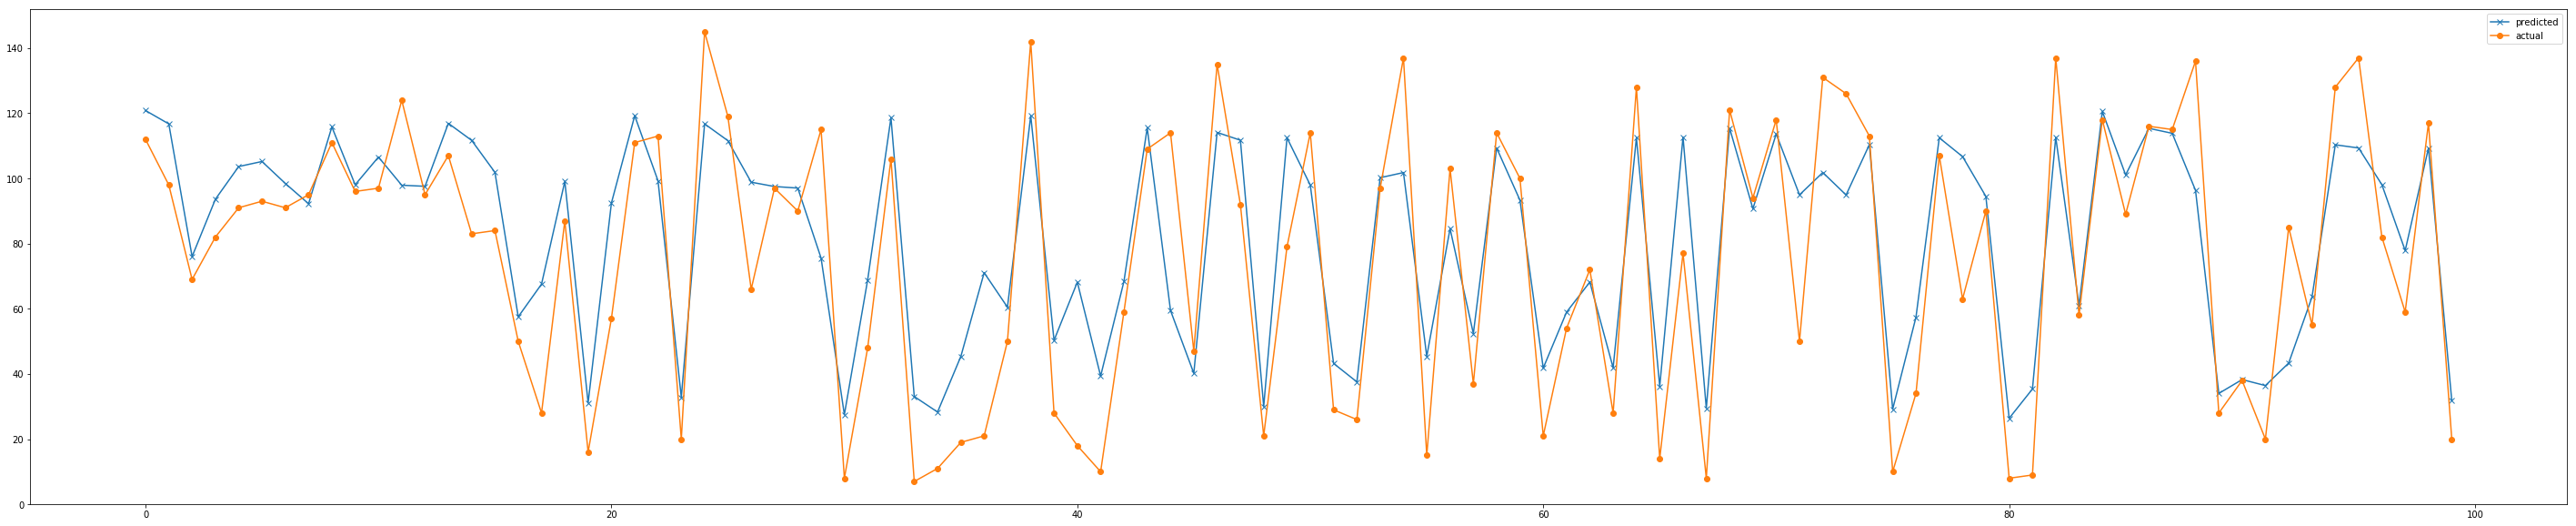

In [57]:
plt.figure(figsize=(50, 10))
plt.plot(range(len(predicted)), predicted, '-x', label='predicted')
plt.plot(range(len(y_test)), y_test, '-o', label='actual')
plt.legend()

# Visualize intermediate outputs

In [58]:
from keras.models import Model
def getVizModel(model):
    output_layers = [l.output for l in model.layers]
    viz_model = Model(saved_model.input, output_layers)
    return viz_model

In [59]:
viz_model = getVizModel(saved_model)

In [60]:
layer_outputs = viz_model.predict(X_train)

In [61]:
layer_outputs[0].shape

(5000, 200, 18)

In [62]:
import math
def plotLayerData(layer_data, mcIndex):
    mcData = layer_data[mcIndex]
    plt.figure(figsize=(30, 30))
    nCols = 2
    nRows = math.ceil(len(mcData[0])/nCols)
    for i in range(len(mcData[0])):
        plt.subplot(nRows, nCols, i+1)
        plt.plot(range(len(mcData[:, i])), mcData[:, i])
        plt.tight_layout()

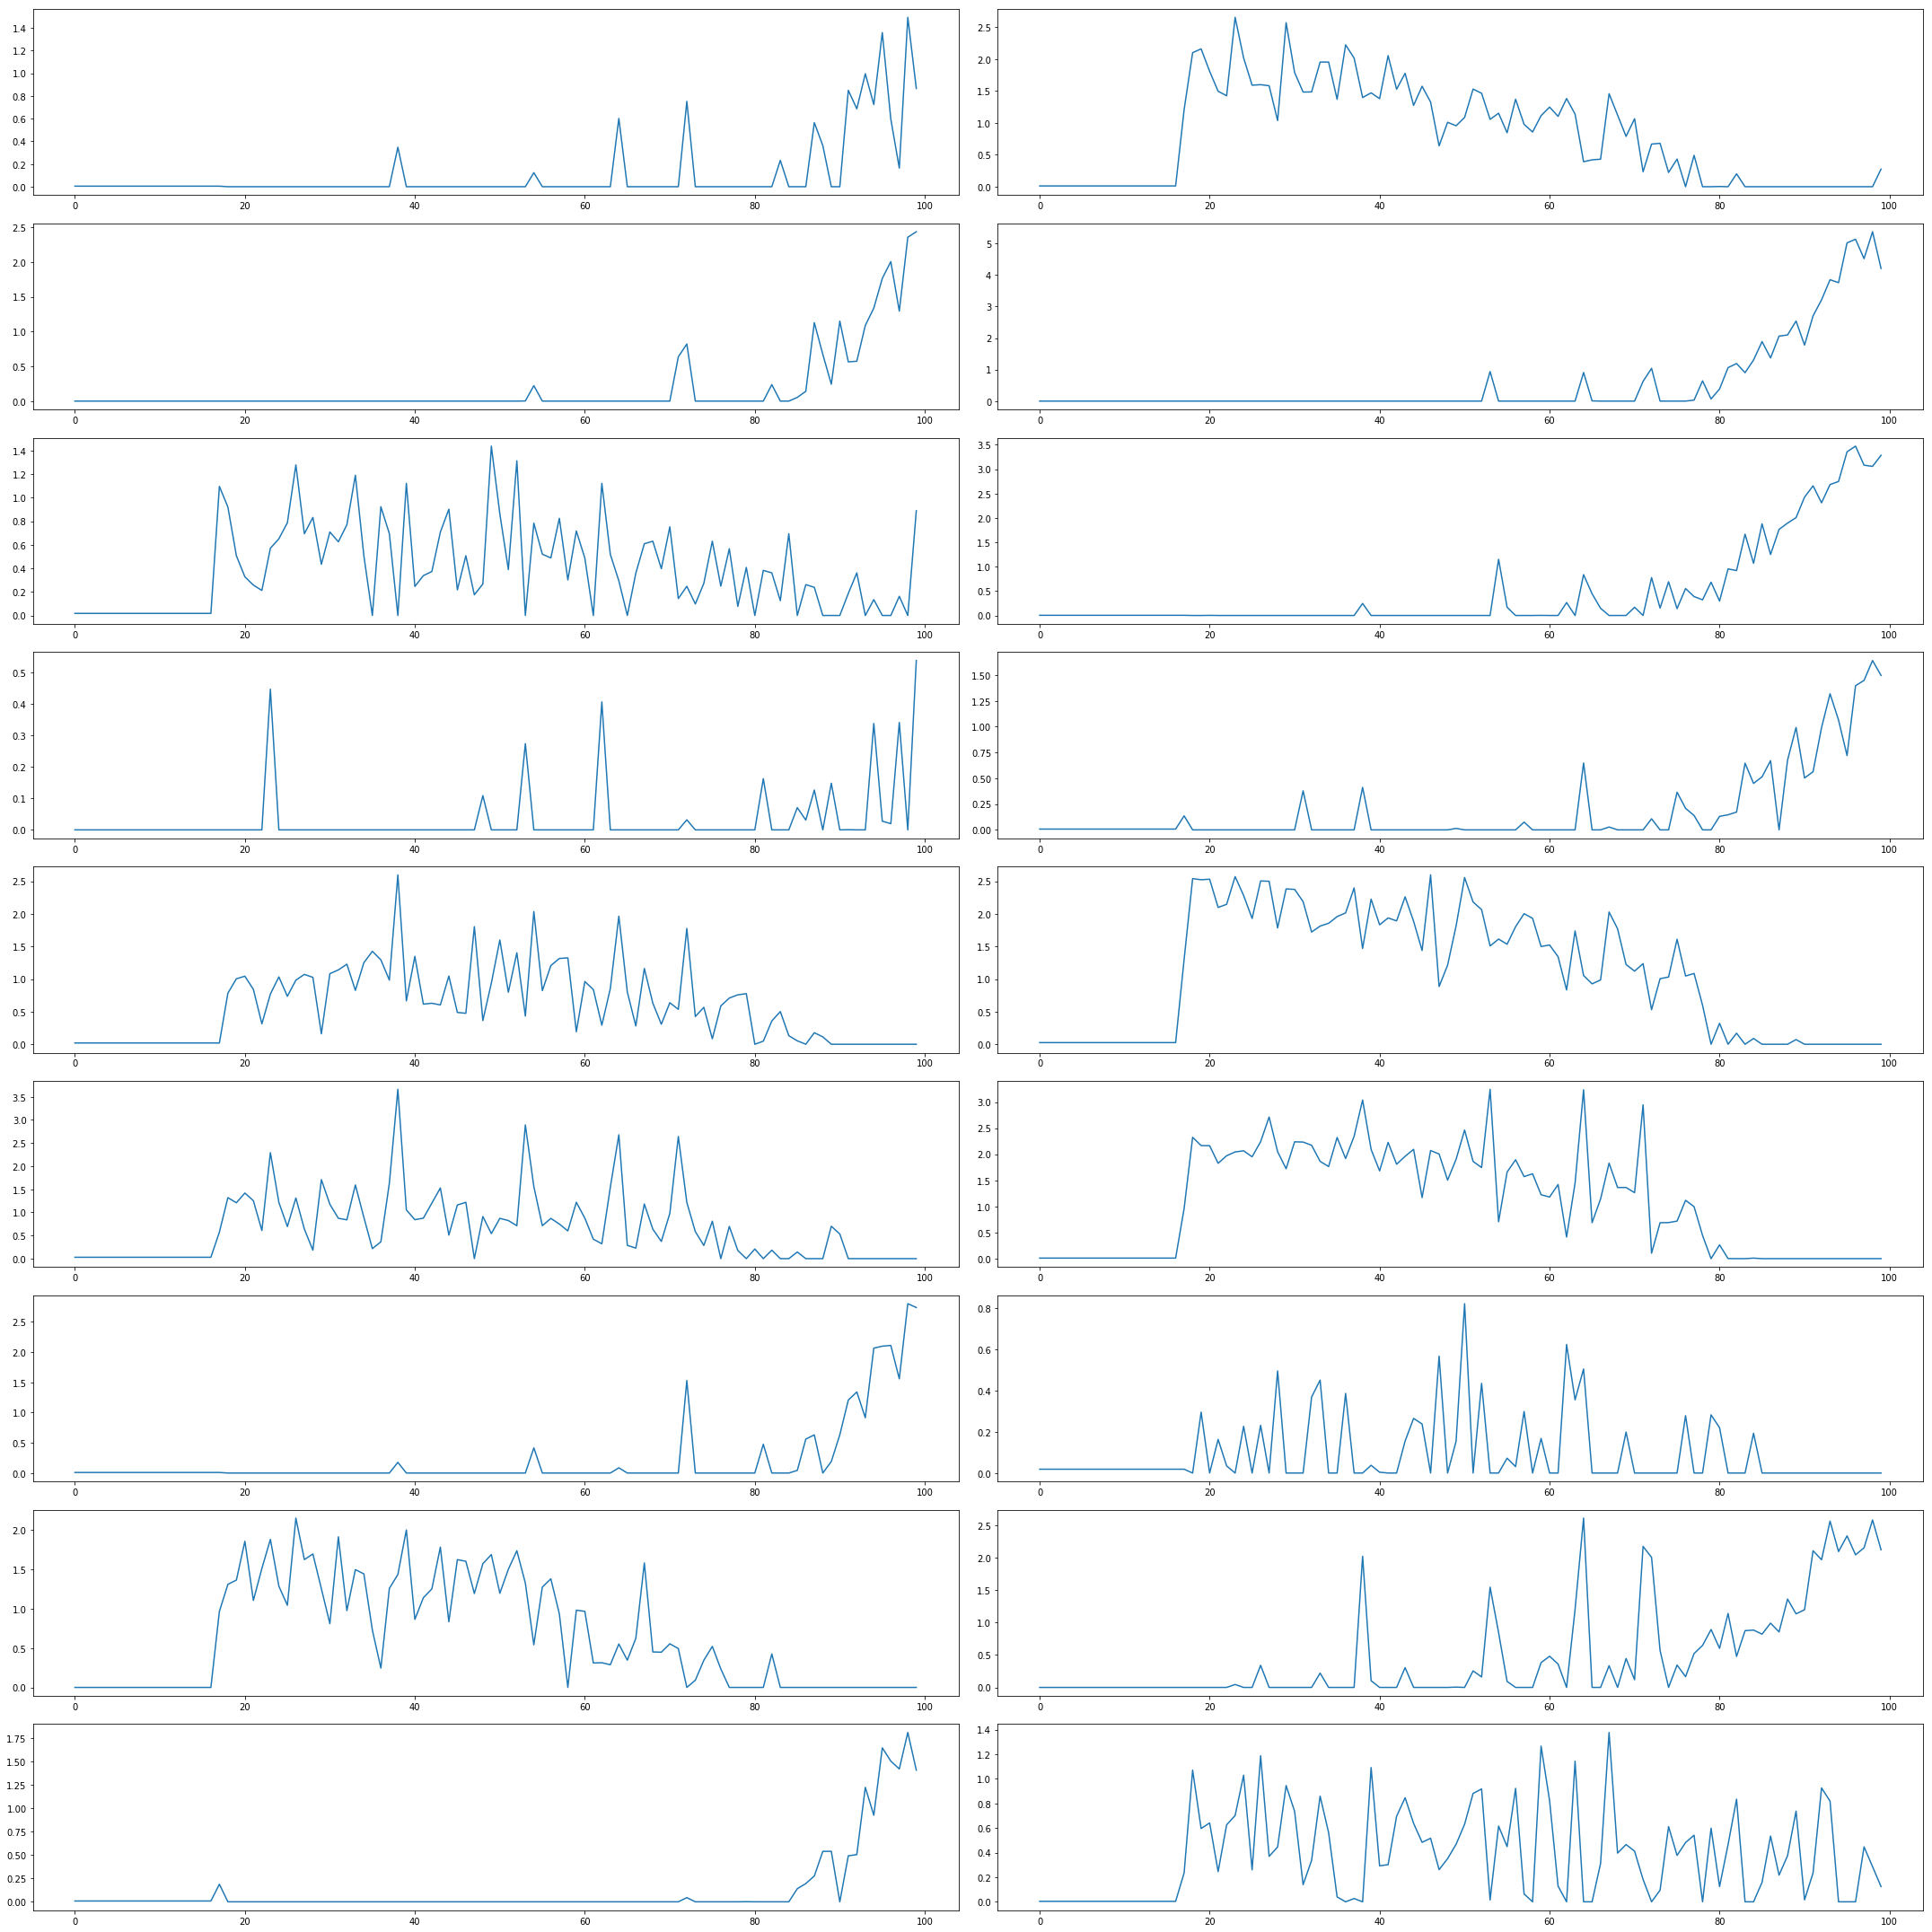

In [63]:
plotLayerData(layer_outputs[1], 100)

In [64]:
import seaborn as sns
def plotLayerHeatmap(layer_data, mcIndex):
    mcData = layer_data[mcIndex]
    plt.figure(figsize=(30, 10))
    sns.heatmap(mcData.transpose())

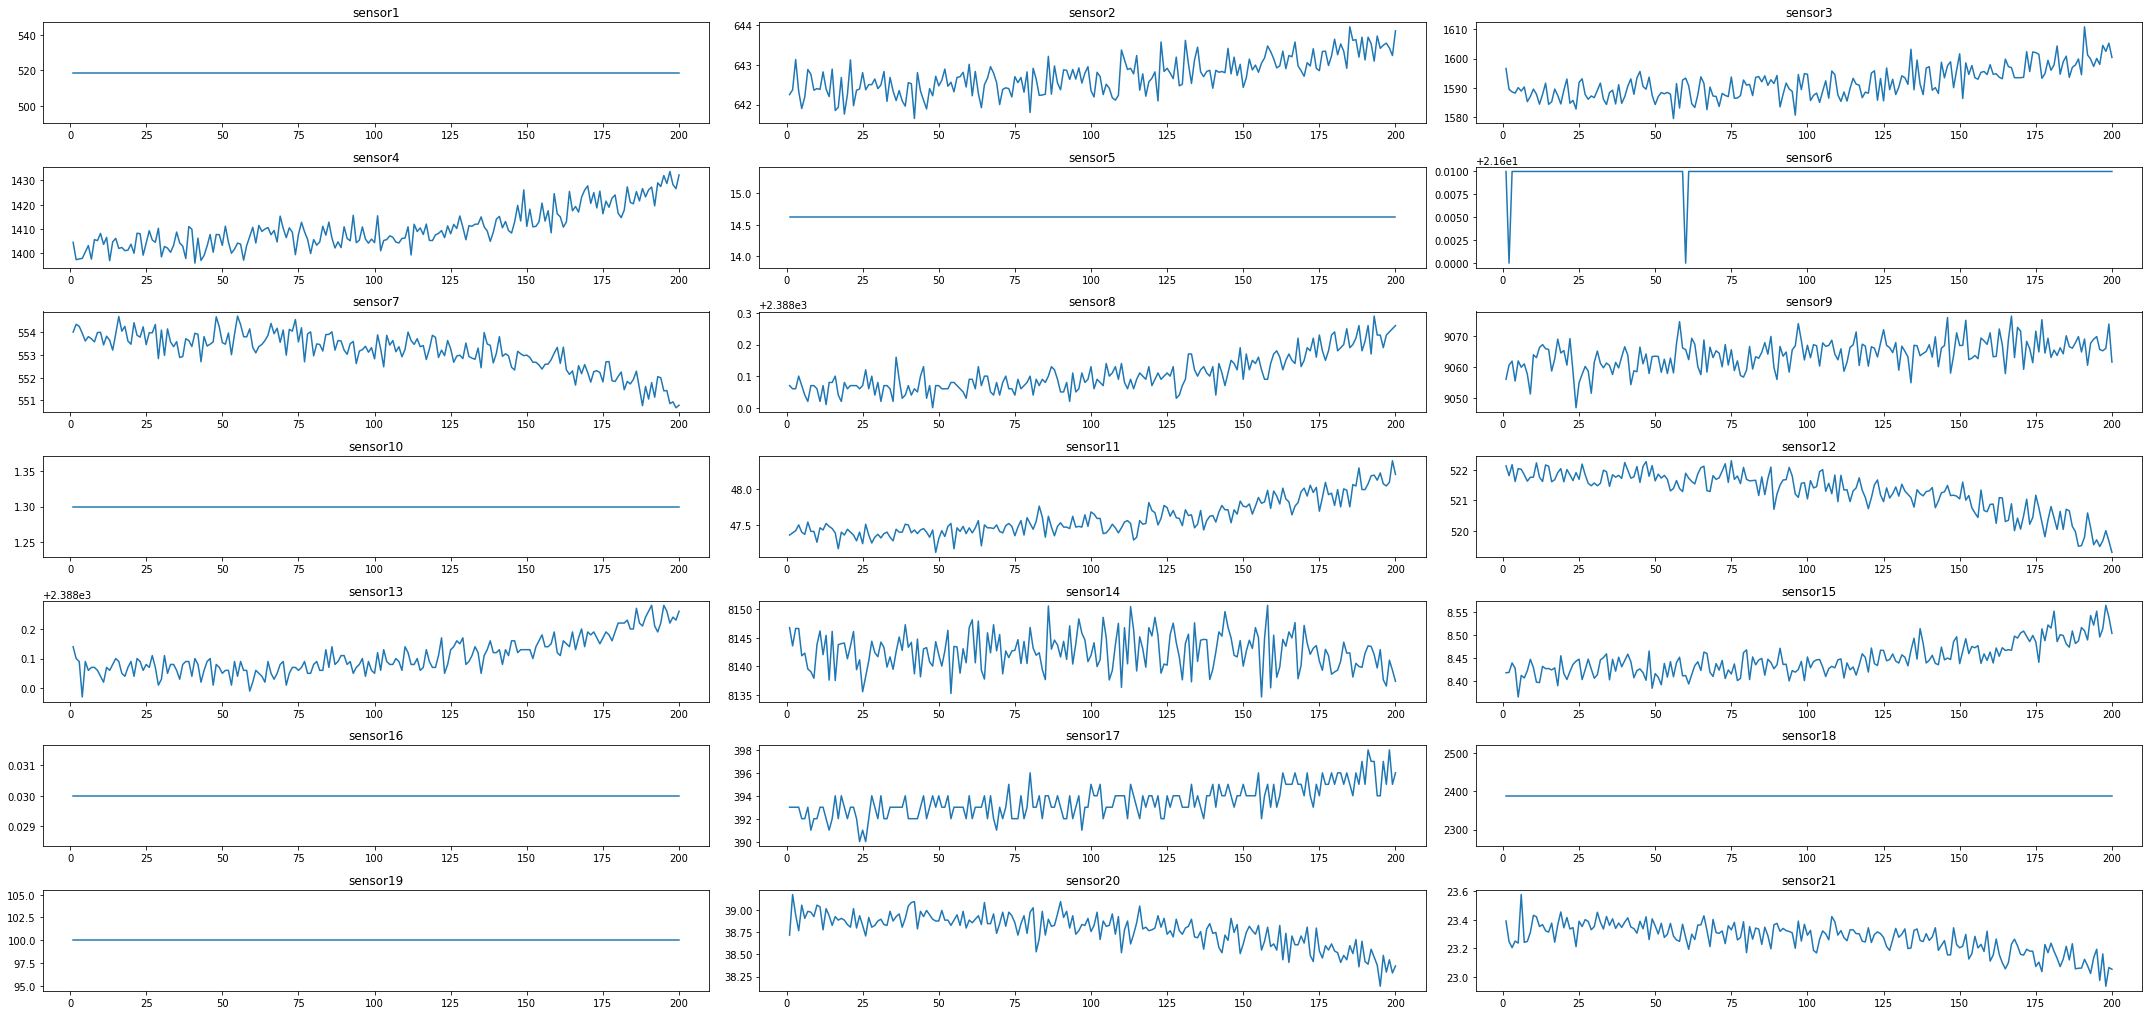

In [65]:
plotSensorDataOfId(train, 100)

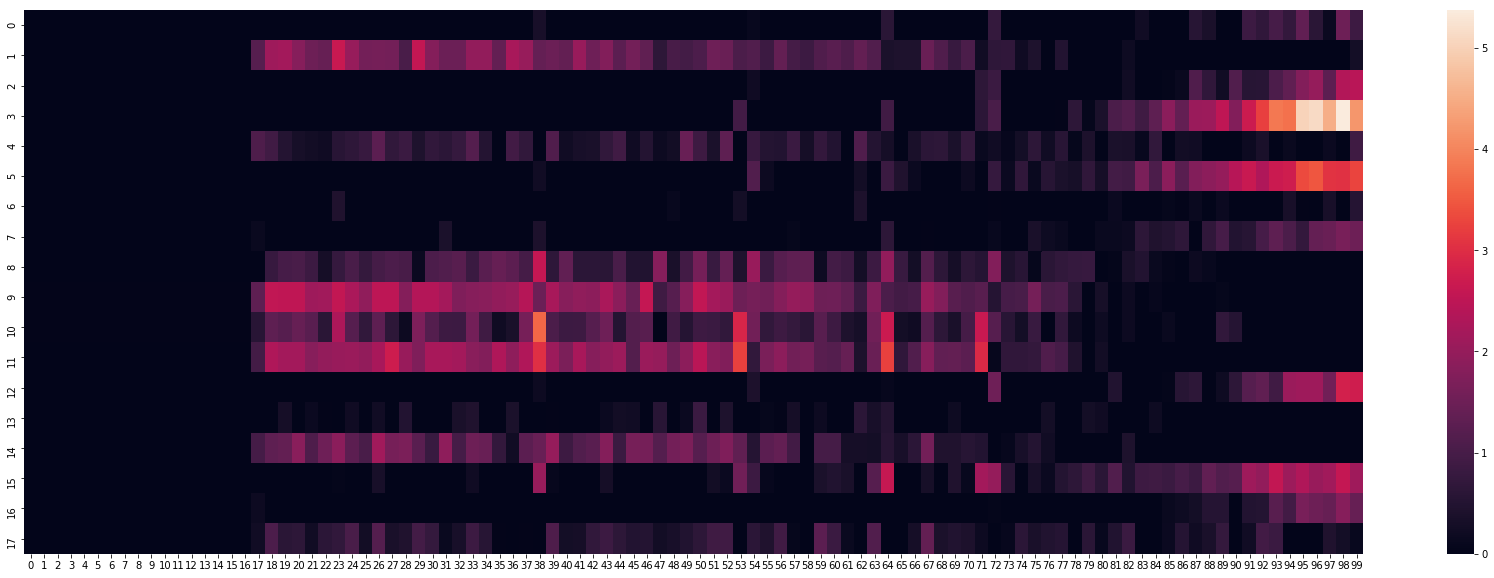

In [66]:
plotLayerHeatmap(layer_outputs[1], 100)